In [1]:
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import re
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings('ignore')

In [2]:
url='https://www.booking.com/searchresults.en-gb.html?sid=a51a365feffa9a8d3a49da8ce5239e6d&aid=355028&lang=en-gb&sb=1&sb_lp=1&src=index&src_elem=sb&error_url=https%3A%2F%2Fwww.booking.com%2Findex.en-gb.html%3Faid%3D355028%26sid%3Da51a365feffa9a8d3a49da8ce5239e6d%26sb_price_type%3Dtotal%3Bsrpvid%3D93ed82dc83df0086%26%26&ss=Bangalore&is_ski_area=0&ssne=Bangalore&ssne_untouched=Bangalore&dest_id=-2090174&dest_type=city&checkin_year=2022&checkin_month=7&checkin_monthday=1&checkout_year=2022&checkout_month=7&checkout_monthday=2&group_adults=2&group_children=0&no_rooms=1&b_h4u_keep_filters=&from_sf=25&offset=0'

In [3]:
headers={"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36"}

In [4]:
page=requests.get(url,headers=headers)

In [5]:
page.status_code

200

In [6]:
# getting the HTML content from the page

pagecontent=page.content

In [7]:
soup=BeautifulSoup(pagecontent,'html.parser')

In [8]:
for div in soup.find_all('div',attrs={'class':"d20f4628d0"}):
    print(div.text)

Opens in new windowFabHotel Rotano Suites YelahankaOpens in new windowBangaloreShow on map13.8 km from centre7.7Good 170 reviewsLimited-time DealDeluxe Room1 double bed1 night, 2 adults₹ 3,021₹ 1,480+₹ 178 taxes and chargesSee availability
Opens in new windowHotel Chetan InternationalOpens in new windowGandhi nagar, BangaloreShow on map2.6 km from centre7.7Good 288 reviewsGetaway Deal Standard Double Room1 large double bedFREE cancellation • No prepayment neededYou can cancel later, so lock in this great price today.Only 3 rooms left at this price on our site1 night, 2 adults₹ 1,600₹ 1,280+₹ 154 taxes and chargesEarn ₹ 100 CreditsYou'll earn ₹ 100 Credits. It'll be added to your Wallet 14 days after your stay and expires in one year.See availability
Breakfast includedOpens in new windowTEST hotelOpens in new windowBellandur, BangaloreShow on map9.2 km from centreNew to Booking.comDeluxe Double Room1 large double bedBreakfast includedFREE cancellation • No prepayment neededYou can cance

### Extracting Data From the URL

In [9]:
Hotel_name=[]
Price_before_Discount=[]
Price_after_Discount=[]
Tax_and_Charges=[]
Type_of_Room=[]
Type_of_Beds=[]
Rating=[]
Review=[]
No_of_Reviews=[]
Rooms_left=[]
Cancellation=[]
for page in range(0,34):
    url='https://www.booking.com/searchresults.en-gb.html?sid=a51a365feffa9a8d3a49da8ce5239e6d&aid=355028&lang=en-gb&sb=1&sb_lp=1&src=index&src_elem=sb&error_url=https%3A%2F%2Fwww.booking.com%2Findex.en-gb.html%3Faid%3D355028%26sid%3Da51a365feffa9a8d3a49da8ce5239e6d%26sb_price_type%3Dtotal%3Bsrpvid%3D93ed82dc83df0086%26%26&ss=Bangalore&is_ski_area=0&ssne=Bangalore&ssne_untouched=Bangalore&dest_id=-2090174&dest_type=city&checkin_year=2022&checkin_month=7&checkin_monthday=1&checkout_year=2022&checkout_month=7&checkout_monthday=2&group_adults=2&group_children=0&no_rooms=1&b_h4u_keep_filters=&from_sf=25&offset={}'.format(page*25)
    print(url)
    page=requests.get(url,headers=headers)
    pagecontent=page.content
    soup=BeautifulSoup(pagecontent,'html.parser')
    for div in soup.find_all('div',attrs={'class':"d20f4628d0"}):
        hname=div.find('div',attrs={'class':"fcab3ed991 a23c043802"})
        pbd=div.find('span',attrs={'class':"a0c113411d e293a04099"})
        pad=div.find('span',attrs={'class':"fcab3ed991 bd73d13072"})
        tax=div.find('div',attrs={'class':"d8eab2cf7f c257e924ca"})
        tor=div.find('span',attrs={'class':"df597226dd"})
        bedt=div.find('div',attrs={'class':"cb5b4b68a4"})
        ratin=div.find('div',attrs={'class':"b5cd09854e d10a6220b4"})
        reviw=div.find('div',attrs={'class':"b5cd09854e f0d4d6a2f5 e46e88563a"})
        nreviews=div.find('div',attrs={'class':"d8eab2cf7f c90c0a70d3 db63693c62"})
        roomsl=div.find('div',attrs={'class':"cb1f9edcd4"})
        cancel=div.find('div',attrs={'class':"d506630cf3"})
        
        if hname is None:
            Hotel_name.append(np.NaN)
        else:
            Hotel_name.append(hname.text)
        if pbd is None:
            Price_before_Discount.append(np.NaN)
        else:
            Price_before_Discount.append(pbd.text)
        if pad is None:
            Price_after_Discount.append(np.NaN)
        else:
            Price_after_Discount.append(pad.text)
        if tax is None:
            Tax_and_Charges.append(np.NaN)
        else:
            Tax_and_Charges.append(tax.text)
        if tor is None:
            Type_of_Room.append(np.NaN)
        else:
            Type_of_Room.append(tor.text)
        if bedt is None:
            Type_of_Beds.append(np.NaN)
        else:
            Type_of_Beds.append(bedt.text)  
        if ratin is None:
            Rating.append(np.NaN)
        else:
            Rating.append(ratin.text)
        if reviw is None:
            Review.append(np.NaN)
        else:
            Review.append(reviw.text)
        if nreviews is None:
            No_of_Reviews.append(np.NaN)
        else:
            No_of_Reviews.append(nreviews.text)
        if roomsl is None:
            Rooms_left.append(np.NaN)
        else:
            Rooms_left.append(roomsl.text)
        if cancel is None:
            Cancellation.append(np.NaN)
        else:
            Cancellation.append(cancel.text)
    print(page)
            
    
        
        
        
                

https://www.booking.com/searchresults.en-gb.html?sid=a51a365feffa9a8d3a49da8ce5239e6d&aid=355028&lang=en-gb&sb=1&sb_lp=1&src=index&src_elem=sb&error_url=https%3A%2F%2Fwww.booking.com%2Findex.en-gb.html%3Faid%3D355028%26sid%3Da51a365feffa9a8d3a49da8ce5239e6d%26sb_price_type%3Dtotal%3Bsrpvid%3D93ed82dc83df0086%26%26&ss=Bangalore&is_ski_area=0&ssne=Bangalore&ssne_untouched=Bangalore&dest_id=-2090174&dest_type=city&checkin_year=2022&checkin_month=7&checkin_monthday=1&checkout_year=2022&checkout_month=7&checkout_monthday=2&group_adults=2&group_children=0&no_rooms=1&b_h4u_keep_filters=&from_sf=25&offset=0
<Response [200]>
https://www.booking.com/searchresults.en-gb.html?sid=a51a365feffa9a8d3a49da8ce5239e6d&aid=355028&lang=en-gb&sb=1&sb_lp=1&src=index&src_elem=sb&error_url=https%3A%2F%2Fwww.booking.com%2Findex.en-gb.html%3Faid%3D355028%26sid%3Da51a365feffa9a8d3a49da8ce5239e6d%26sb_price_type%3Dtotal%3Bsrpvid%3D93ed82dc83df0086%26%26&ss=Bangalore&is_ski_area=0&ssne=Bangalore&ssne_untouched=Ban

<Response [200]>
https://www.booking.com/searchresults.en-gb.html?sid=a51a365feffa9a8d3a49da8ce5239e6d&aid=355028&lang=en-gb&sb=1&sb_lp=1&src=index&src_elem=sb&error_url=https%3A%2F%2Fwww.booking.com%2Findex.en-gb.html%3Faid%3D355028%26sid%3Da51a365feffa9a8d3a49da8ce5239e6d%26sb_price_type%3Dtotal%3Bsrpvid%3D93ed82dc83df0086%26%26&ss=Bangalore&is_ski_area=0&ssne=Bangalore&ssne_untouched=Bangalore&dest_id=-2090174&dest_type=city&checkin_year=2022&checkin_month=7&checkin_monthday=1&checkout_year=2022&checkout_month=7&checkout_monthday=2&group_adults=2&group_children=0&no_rooms=1&b_h4u_keep_filters=&from_sf=25&offset=350
<Response [200]>
https://www.booking.com/searchresults.en-gb.html?sid=a51a365feffa9a8d3a49da8ce5239e6d&aid=355028&lang=en-gb&sb=1&sb_lp=1&src=index&src_elem=sb&error_url=https%3A%2F%2Fwww.booking.com%2Findex.en-gb.html%3Faid%3D355028%26sid%3Da51a365feffa9a8d3a49da8ce5239e6d%26sb_price_type%3Dtotal%3Bsrpvid%3D93ed82dc83df0086%26%26&ss=Bangalore&is_ski_area=0&ssne=Bangalore

<Response [200]>
https://www.booking.com/searchresults.en-gb.html?sid=a51a365feffa9a8d3a49da8ce5239e6d&aid=355028&lang=en-gb&sb=1&sb_lp=1&src=index&src_elem=sb&error_url=https%3A%2F%2Fwww.booking.com%2Findex.en-gb.html%3Faid%3D355028%26sid%3Da51a365feffa9a8d3a49da8ce5239e6d%26sb_price_type%3Dtotal%3Bsrpvid%3D93ed82dc83df0086%26%26&ss=Bangalore&is_ski_area=0&ssne=Bangalore&ssne_untouched=Bangalore&dest_id=-2090174&dest_type=city&checkin_year=2022&checkin_month=7&checkin_monthday=1&checkout_year=2022&checkout_month=7&checkout_monthday=2&group_adults=2&group_children=0&no_rooms=1&b_h4u_keep_filters=&from_sf=25&offset=700
<Response [200]>
https://www.booking.com/searchresults.en-gb.html?sid=a51a365feffa9a8d3a49da8ce5239e6d&aid=355028&lang=en-gb&sb=1&sb_lp=1&src=index&src_elem=sb&error_url=https%3A%2F%2Fwww.booking.com%2Findex.en-gb.html%3Faid%3D355028%26sid%3Da51a365feffa9a8d3a49da8ce5239e6d%26sb_price_type%3Dtotal%3Bsrpvid%3D93ed82dc83df0086%26%26&ss=Bangalore&is_ski_area=0&ssne=Bangalore

In [10]:
len(Hotel_name)
len(Price_before_Discount)
len(Price_after_Discount)
len(Tax_and_Charges)
len(Type_of_Room)
len(Type_of_Beds)
len(Rating)
len(No_of_Reviews)
len(Rooms_left)
len(Cancellation)

# Checking lenth's of each column

599

## Creating a Data Frame using all the Extracted Data

In [11]:
Hotel_df=pd.DataFrame({'Hotel_name':Hotel_name,'Price_before_Discount':Price_before_Discount,'Price_after_Discount':Price_after_Discount,'Tax_and_Charges':Tax_and_Charges,'Type_of_Room':Type_of_Room,'Type_of_Beds':Type_of_Beds,'Rating':Rating,'Review':Review,'No_of_Reviews':No_of_Reviews,'Rooms_left':Rooms_left,'Cancellation':Cancellation,})

In [12]:
Hotel_df

,Hotel_name,Price_before_Discount,Price_after_Discount,Tax_and_Charges,Type_of_Room,Type_of_Beds,Rating,Review,No_of_Reviews,Rooms_left,Cancellation
0,Hotel Chetan International,"₹ 1,600","₹ 1,280",+₹ 154 taxes and charges,Standard Double Room,1 large double bed,7.7,Good,288 reviews,Only 3 rooms left at this price on our site,FREE cancellation • No prepayment needed
1,FabHotel Rotano Suites Yelahanka,"₹ 3,021","₹ 1,480",+₹ 178 taxes and charges,Deluxe Room,1 double bed,7.7,Good,170 reviews,NaN,NaN
2,BNGV Mystic Premier Hotel,NaN,"₹ 4,100",+₹ 492 taxes and charges,Deluxe King Room,1 single bed,6.2,Review score,160 reviews,Only 5 rooms left at this price on our site,FREE cancellation • No prepayment needed
3,TEST hotel,NaN,"₹ 6,000",+₹ 720 taxes and charges,Deluxe Double Room,1 large double bed,NaN,NaN,NaN,NaN,FREE cancellation • No prepayment needed
4,Vistar Resort & Hotels,NaN,"₹ 2,699",+₹ 324 taxes and charges,Standard Double Room with Fan,1 extra-large double bed,8.3,Very good,30 reviews,Only 1 room left at this price on our site,NaN
...,...,...,...,...,...,...,...,...,...,...,...
594,SPOT ON 47596 Gayatri Comforts,"₹ 2,368","₹ 1,184",+₹ 45 taxes and charges,Single Room with Bathroom,2 large double beds,3.4,Review score,14 reviews,NaN,Free cancellation
595,Abuzz Oxfordcaps Bannerghatta,NaN,"₹ 1,000",Includes taxes and charges,Bunk Bed in Male Dormitory Room,2 beds in dormitories2 bunk beds,5.7,Review score,3 reviews,NaN,NaN
596,HOTEL STAY INN,NaN,"₹ 4,249",+₹ 510 taxes and charges,Budget Single Room,1 single bed,9.0,Superb,2 reviews,NaN,NaN
597,zions hotel,"₹ 6,000","₹ 4,500",+₹ 540 taxes and charges,Deluxe Single Room with Balcony,2 single beds,NaN,NaN,NaN,NaN,FREE cancellation • No prepayment needed


### Saving The Raw Data in CSV file

In [13]:
Hotel_df.to_csv(r'.\HotelBookingRawData.csv')

In [14]:
Hotel_df.head()

,Hotel_name,Price_before_Discount,Price_after_Discount,Tax_and_Charges,Type_of_Room,Type_of_Beds,Rating,Review,No_of_Reviews,Rooms_left,Cancellation
0,Hotel Chetan International,"₹ 1,600","₹ 1,280",+₹ 154 taxes and charges,Standard Double Room,1 large double bed,7.7,Good,288 reviews,Only 3 rooms left at this price on our site,FREE cancellation • No prepayment needed
1,FabHotel Rotano Suites Yelahanka,"₹ 3,021","₹ 1,480",+₹ 178 taxes and charges,Deluxe Room,1 double bed,7.7,Good,170 reviews,NaN,NaN
2,BNGV Mystic Premier Hotel,NaN,"₹ 4,100",+₹ 492 taxes and charges,Deluxe King Room,1 single bed,6.2,Review score,160 reviews,Only 5 rooms left at this price on our site,FREE cancellation • No prepayment needed
3,TEST hotel,NaN,"₹ 6,000",+₹ 720 taxes and charges,Deluxe Double Room,1 large double bed,NaN,NaN,NaN,NaN,FREE cancellation • No prepayment needed
4,Vistar Resort & Hotels,NaN,"₹ 2,699",+₹ 324 taxes and charges,Standard Double Room with Fan,1 extra-large double bed,8.3,Very good,30 reviews,Only 1 room left at this price on our site,NaN


### Data Type before Conversion

In [15]:
Hotel_df.dtypes

Hotel_name               object
Price_before_Discount    object
Price_after_Discount     object
Tax_and_Charges          object
Type_of_Room             object
Type_of_Beds             object
Rating                   object
Review                   object
No_of_Reviews            object
Rooms_left               object
Cancellation             object
dtype: object

### Data Cleaning and Converting Data Types

In [16]:
# Replacing '₹' and ',' with void 

Hotel_df['Price_after_Discount']=Hotel_df['Price_after_Discount'].apply(lambda x:x.replace("₹","").replace(",","")).astype('int32')

In [17]:
# Replacing '₹','+','taxes and charges' and ',' with void

Hotel_df['Tax_and_Charges']=Hotel_df['Tax_and_Charges'].str.replace("₹","")
Hotel_df['Tax_and_Charges']=Hotel_df['Tax_and_Charges'].str.replace("+","")
Hotel_df['Tax_and_Charges']=Hotel_df['Tax_and_Charges'].str.replace("taxes and charges","")
Hotel_df['Tax_and_Charges']=Hotel_df['Tax_and_Charges'].str.replace(",","")

In [18]:
# Replacing 'Review score' with Pleasant

Hotel_df['Review']=Hotel_df['Review'].str.replace("Review score","Plesant")

In [19]:
# Replacing 'reviews','review' and ',' with void

Hotel_df['No_of_Reviews']=Hotel_df['No_of_Reviews'].str.replace("reviews","")
Hotel_df['No_of_Reviews']=Hotel_df['No_of_Reviews'].str.replace("review","")
Hotel_df['No_of_Reviews']=Hotel_df['No_of_Reviews'].str.replace(",","")

In [20]:
#Replacing 'at this price on our site' with void

Hotel_df['Rooms_left']=Hotel_df['Rooms_left'].str.replace("at this price on our site","")

In [21]:
# Replacing 'Beds:' with void

Hotel_df['Type_of_Beds']=Hotel_df['Type_of_Beds'].str.replace("Beds:","")

In [22]:
# Reolacing '₹' and ',' with void

Hotel_df['Price_before_Discount']=Hotel_df['Price_before_Discount'].str.replace('₹','')
Hotel_df['Price_before_Discount']=Hotel_df['Price_before_Discount'].str.replace(',','')

In [23]:
# Filling all the NaN values

Hotel_df['Rooms_left']=Hotel_df['Rooms_left'].fillna('No Rooms left')
Hotel_df['Price_before_Discount']=Hotel_df['Price_before_Discount'].fillna(0)
Hotel_df['No_of_Reviews']=Hotel_df['No_of_Reviews'].fillna(0)
Hotel_df['Rating']=Hotel_df['Rating'].fillna(0.0)
Hotel_df['Review']=Hotel_df['Review'].fillna('No Review')

### Data Frame after Data Cleaning

In [24]:
Hotel_df

,Hotel_name,Price_before_Discount,Price_after_Discount,Tax_and_Charges,Type_of_Room,Type_of_Beds,Rating,Review,No_of_Reviews,Rooms_left,Cancellation
0,Hotel Chetan International,1600,1280,154,Standard Double Room,1 large double bed,7.7,Good,288,Only 3 rooms left,FREE cancellation • No prepayment needed
1,FabHotel Rotano Suites Yelahanka,3021,1480,178,Deluxe Room,1 double bed,7.7,Good,170,No Rooms left,NaN
2,BNGV Mystic Premier Hotel,0,4100,492,Deluxe King Room,1 single bed,6.2,Plesant,160,Only 5 rooms left,FREE cancellation • No prepayment needed
3,TEST hotel,0,6000,720,Deluxe Double Room,1 large double bed,0.0,No Review,0,No Rooms left,FREE cancellation • No prepayment needed
4,Vistar Resort & Hotels,0,2699,324,Standard Double Room with Fan,1 extra-large double bed,8.3,Very good,30,Only 1 room left,NaN
...,...,...,...,...,...,...,...,...,...,...,...
594,SPOT ON 47596 Gayatri Comforts,2368,1184,45,Single Room with Bathroom,2 large double beds,3.4,Plesant,14,No Rooms left,Free cancellation
595,Abuzz Oxfordcaps Bannerghatta,0,1000,Includes,Bunk Bed in Male Dormitory Room,2 beds in dormitories2 bunk beds,5.7,Plesant,3,No Rooms left,NaN
596,HOTEL STAY INN,0,4249,510,Budget Single Room,1 single bed,9.0,Superb,2,No Rooms left,NaN
597,zions hotel,6000,4500,540,Deluxe Single Room with Balcony,2 single beds,0.0,No Review,0,No Rooms left,FREE cancellation • No prepayment needed


### Converting Data Types

In [25]:
Hotel_df['Rating']=Hotel_df['Rating'].astype(float)

#Coverting Object to float

In [26]:
Hotel_df['Price_before_Discount']=Hotel_df['Price_before_Discount'].astype('int32')

# Converting object to int32

In [27]:
Hotel_df['No_of_Reviews']=Hotel_df['No_of_Reviews'].astype('int32')

#Converting object to int32

### Data Type after Conversion

In [28]:
Hotel_df.dtypes

Hotel_name                object
Price_before_Discount      int32
Price_after_Discount       int32
Tax_and_Charges           object
Type_of_Room              object
Type_of_Beds              object
Rating                   float64
Review                    object
No_of_Reviews              int32
Rooms_left                object
Cancellation              object
dtype: object

### Saving Data In CSV file

In [29]:
Hotel_df.to_csv(r'.\HotelBookingCleanedData.csv')

In [30]:
Hotel_df.head()

,Hotel_name,Price_before_Discount,Price_after_Discount,Tax_and_Charges,Type_of_Room,Type_of_Beds,Rating,Review,No_of_Reviews,Rooms_left,Cancellation
0,FabHotel Rotano Suites Yelahanka,3021,1480,178,Deluxe Room,1 double bed,7.7,Good,170,No Rooms left,NaN
1,Fortune Select Trinity - Member ITC Hotel Group,0,3500,420,Standard Double or Twin Room,"3 beds (2 singles, 1 extra-large double)",7.3,Good,62,Only 3 rooms left,NaN
2,TEST hotel,0,6000,720,Deluxe Double Room,1 large double bed,0.0,No Review,0,No Rooms left,FREE cancellation • No prepayment needed
3,OYO 69693 The Royal Park,1109,721,30,Classic Triple Room,1 large double bed,5.7,Plesant,21,Only 3 rooms left,Free cancellation
4,OYO 13121 Hotel Vaayu,836,544,30,Standard Double Room,1 large double bed,0.0,No Review,0,No Rooms left,Free cancellation


In [31]:
Hotel_df.tail()

,Hotel_name,Price_before_Discount,Price_after_Discount,Tax_and_Charges,Type_of_Room,Type_of_Beds,Rating,Review,No_of_Reviews,Rooms_left,Cancellation
590,Abuzz Oxfordcaps Bannerghatta,0,1000,Includes,Bunk Bed in Male Dormitory Room,2 beds in dormitories2 bunk beds,5.7,Plesant,3,No Rooms left,NaN
591,HOTEL STAY INN,0,4249,510,Budget Single Room,1 single bed,9.0,Superb,2,No Rooms left,NaN
592,KR Inn Hotel & Convention Centre,0,8397,1008,Deluxe Single Room,2 single beds,7.2,Good,29,No Rooms left,NaN
593,zions hotel,6000,4500,540,Deluxe Single Room with Balcony,2 single beds,0.0,No Review,0,No Rooms left,FREE cancellation • No prepayment needed
594,Jayamahal Palace,0,6300,756,Standard Double or Twin Room,Choice of beds: double or singles,6.8,Plesant,49,No Rooms left,NaN


In [32]:
# minimum price of a hotel

Hotel_df['Price_after_Discount'].min()

324

In [33]:
# maximum price of a hotel

Hotel_df['Price_after_Discount'].max()

45600

In [34]:
#Lowest Rating

Hotel_df['Rating'].min()

0.0

In [35]:
# Highest Rating

Hotel_df['Rating'].max()

10.0

# Data Visualization 

### Checking the Hotel's and thier prices

In [36]:
Low_price= Hotel_df[Hotel_df['Price_after_Discount']<1000]['Hotel_name']

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83]),
 [Text(0, 0, 'SPOT ON 83080 Hotel Aryan Residency'),
  Text(1, 0, 'OYO 87278 Royal Grand Residency'),
  Text(2, 0, 'OYO Townhouse 76427 Hotel Skyline'),
  Text(3, 0, 'B R Inn'),
  Text(4, 0, 'OYO 90537 Green Residency'),
  Text(5, 0, 'Townhouse OAK M & M Hospitality'),
  Text(6, 0, 'SPOT ON 85465 Hotel P raju'),
  Text(7, 0, 'OYO 69693 The Royal Park'),
  Text(8, 0, 'OYO 79571 Hotel Golden Paradise'),
  Text(9, 0, 'CAPITAL O 23461 Champion Lotus'),
  Text(10, 0, 'OYO Flagship 8252 Aayush Corporate Stays'),
  Text(11, 0, 'OYO 378 Aira Apartments'),
  Text(12, 0, 'OYO BLR2467 Urban Inn'),
  Text(13, 0, 'OYO Flagship 

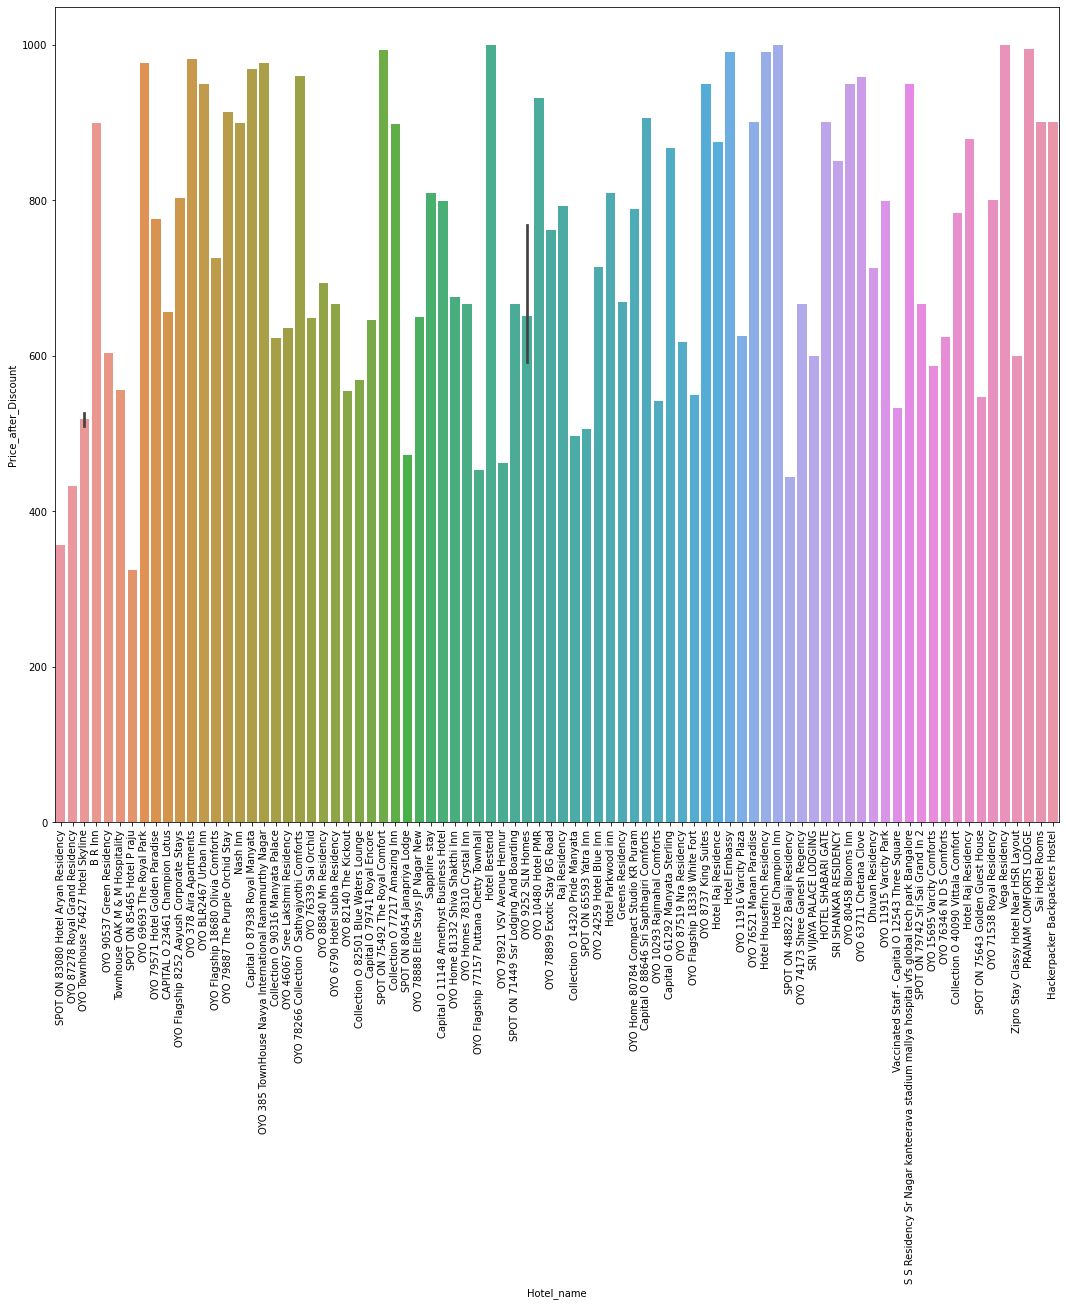

In [37]:
plt.figure(figsize=(18,15))
sns.barplot(Low_price,Hotel_df['Price_after_Discount'])
plt.xticks(rotation=90)

# Hotel's with Price of below 1000rs.

In [38]:
Budget_wala_price= Hotel_df[(Hotel_df['Price_after_Discount']>1000) & (Hotel_df['Price_after_Discount']<1300)]['Hotel_name']

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]),
 [Text(0, 0, 'Octave Plaza Hotel'),
  Text(1, 0, 'OYO 62331 GN Collection O'),
  Text(2, 0, 'Hotel Grand Suites'),
  Text(3, 0, 'OYO 81833 Hotel Red Rose'),
  Text(4, 0, "OYO 10218 Hotel Berry's"),
  Text(5, 0, 'Capital O 37517 Withinn Hotel'),
  Text(6, 0, 'OYO 79958 Together'),
  Text(7, 0, 'Navanidhi Comforts'),
  Text(8, 0, 'OYO Townhouse 038 Banaswadi 100Ft Road'),
  Text(9, 0, 'The Signature Inn'),
  Text(10, 0, 'SPOT ON 75492 The Royal Comfort'),
  Text(11, 0, 'OYO Flagship 67007 Manyu Inn'),
  Text(12, 0, 'Capital O 13184 Savi International'),
  Text(13, 0, 'Capital O 75327 Atithi Residency'),
  Text(14, 0, 'Capital O 70991 Prime Square'),
  Text(15, 0, 'Orange Corner, Near Kempegowda Bangalore international airport'),
  Text(16, 0, 'Octave Kings Suites'),
  Text(17, 

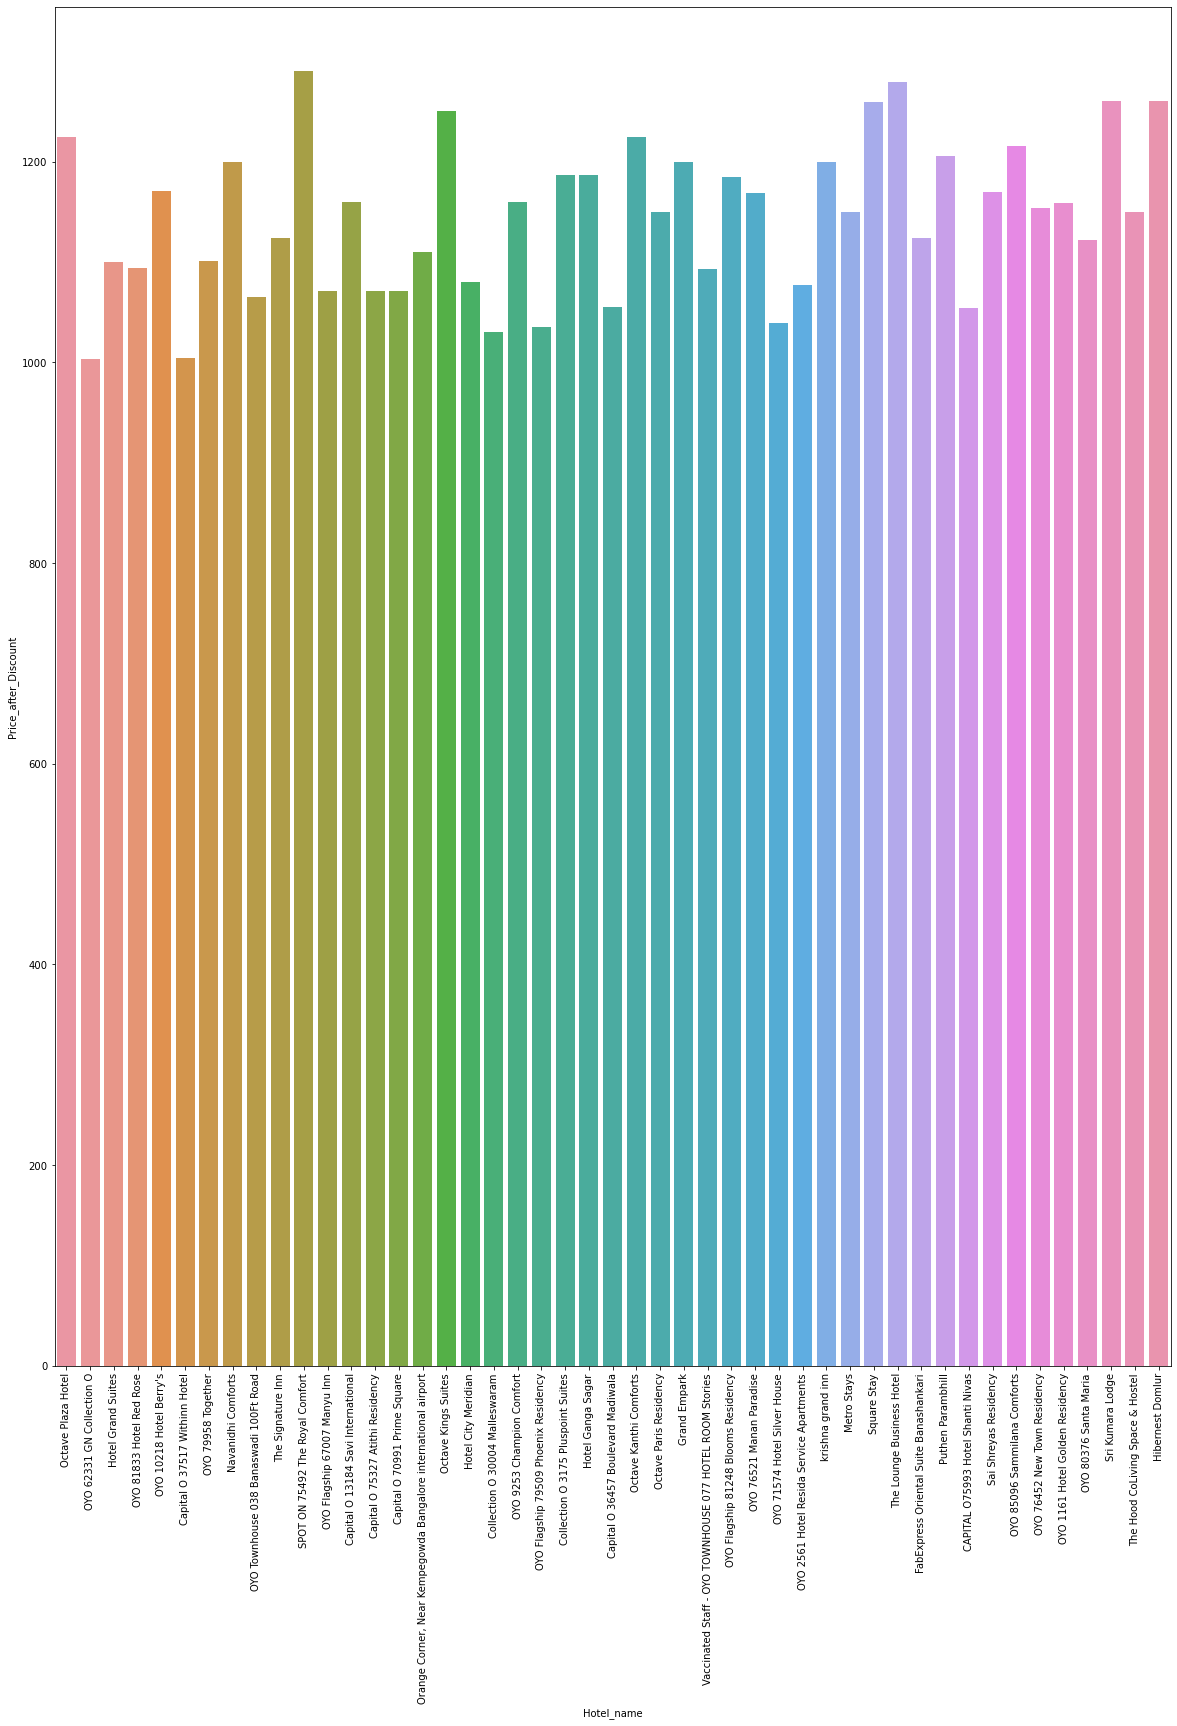

In [39]:
plt.figure(figsize=(20,25))
sns.barplot(Budget_wala_price,Hotel_df['Price_after_Discount'])
plt.xticks(rotation=90)

# Hotel's between the price of 1000 and 3000

In [40]:
Budget_wala_price2= Hotel_df[(Hotel_df['Price_after_Discount']>1300) & (Hotel_df['Price_after_Discount']<1500)]['Hotel_name']

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 [Text(0, 0, 'Nexstay Rainbow Business Hotel'),
  Text(1, 0, 'Hotel RR International'),
  Text(2, 0, 'Octave Himalaya Monarch'),
  Text(3, 0, 'ABM Express Inn'),
  Text(4, 0, 'Townhouse OAK Hotel Prime'),
  Text(5, 0, 'SS CROWN inn'),
  Text(6, 0, 'hotelpearlinn'),
  Text(7, 0, 'Collection O 12684 Compact Green View'),
  Text(8, 0, 'Collection O 30067 Hotel Palmtree'),
  Text(9, 0, 'Soundarya Hotel'),
  Text(10, 0, 'OYO 79958 Together'),
  Text(11, 0, 'Octave Vels Grand Hotel'),
  Text(12, 0, 'Sunrise Triangles'),
  Text(13, 0, 'Hotel ABM International'),
  Text(14, 0, 'OYO 74308 Kings Suites'),
  Text(15, 0, 'Stay for Uptu 10 pax in a 3BH @ Frazer Town For Parties/Event'),
  Text(16, 0, 'VASTHAV Inn'),
  Text(17, 0, 'Single Serviced Room with Breakfast & Wi-Fi'),
  Text(18, 0, 'My home paying guest'),
  Text(19, 0, 'FabHotel Krishnas Landmark'),
  Text(20, 0, 'Treebo Trip Omkar In

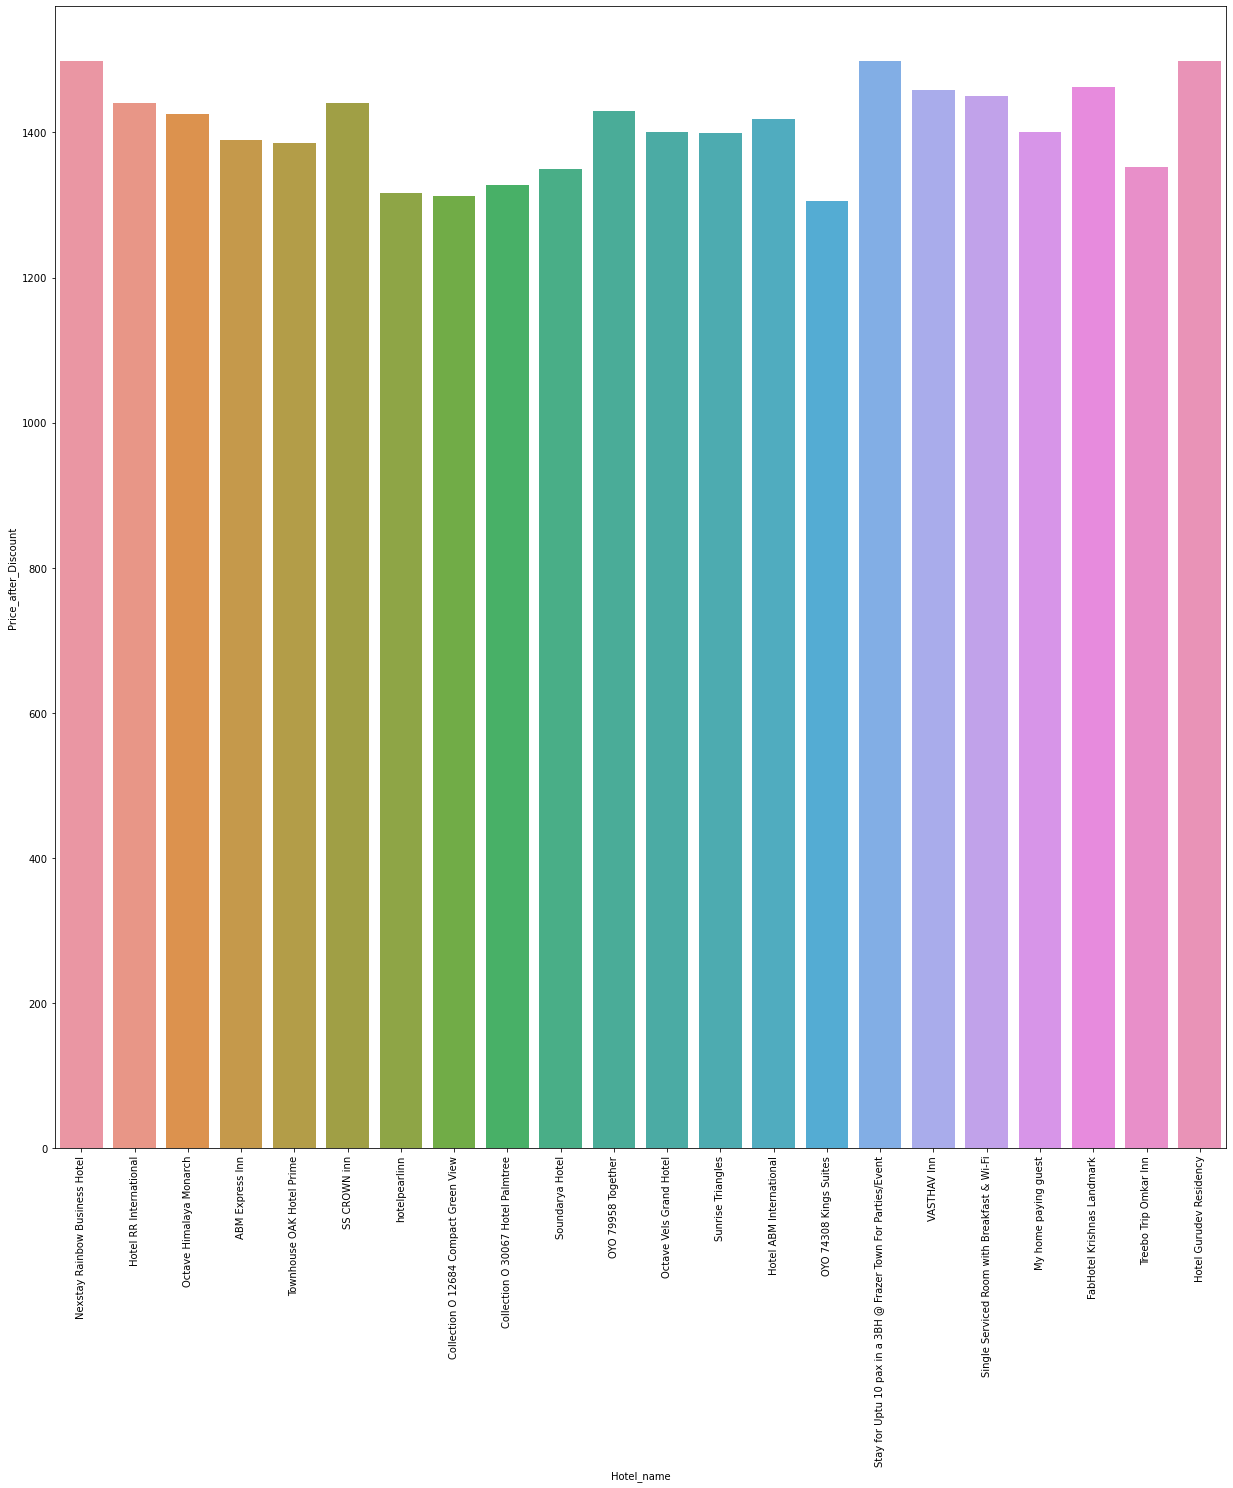

In [41]:
plt.figure(figsize=(21,21))
sns.barplot(Budget_wala_price2,Hotel_df['Price_after_Discount'])
plt.xticks(rotation=90)

# Hotel's between price of 1300 and 1500

In [42]:
Budget_wala_price3= Hotel_df[(Hotel_df['Price_after_Discount']>1500) & (Hotel_df['Price_after_Discount']<1700)]['Hotel_name']

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]),
 [Text(0, 0, 'Komfort Terraces Bangalore'),
  Text(1, 0, 'Hotel Garden Residency By WB Inn'),
  Text(2, 0, 'Octave Jamayca Hotel'),
  Text(3, 0, 'Raintree Accommodation'),
  Text(4, 0, 'FabHotel Rotano Suites Yelahanka'),
  Text(5, 0, 'FabHotel Astra Electronic City'),
  Text(6, 0, 'FabHotel GRK Comforts'),
  Text(7, 0, 'Octave Nest Inn'),
  Text(8, 0, 'Octave Royal Opera'),
  Text(9, 0, 'Treebo Trip Hotel BCP Suites'),
  Text(10, 0, 'hotel fortune suites'),
  Text(11, 0, 'OYO Townhouse 264 Stage 2 BTM Layout'),
  Text(12, 0, 'THE EKAH COMFORTS'),
  Text(13, 0, 'HOTEL ROYAL STAR'),
  Text(14, 0, 'Atlaantic Inn'),
  Text(15, 0, 'hotel fortune city'),
  Text(16, 0, 'HOTEL ROYAL SUITES'),
  Text(17, 0, 'Mulberry Inn'),
  Text(18, 0, 'Treebo Trip Guru Comforts IIM Bangalore'),
  Text(19, 0, 'Hotel UR Comforts Jayan

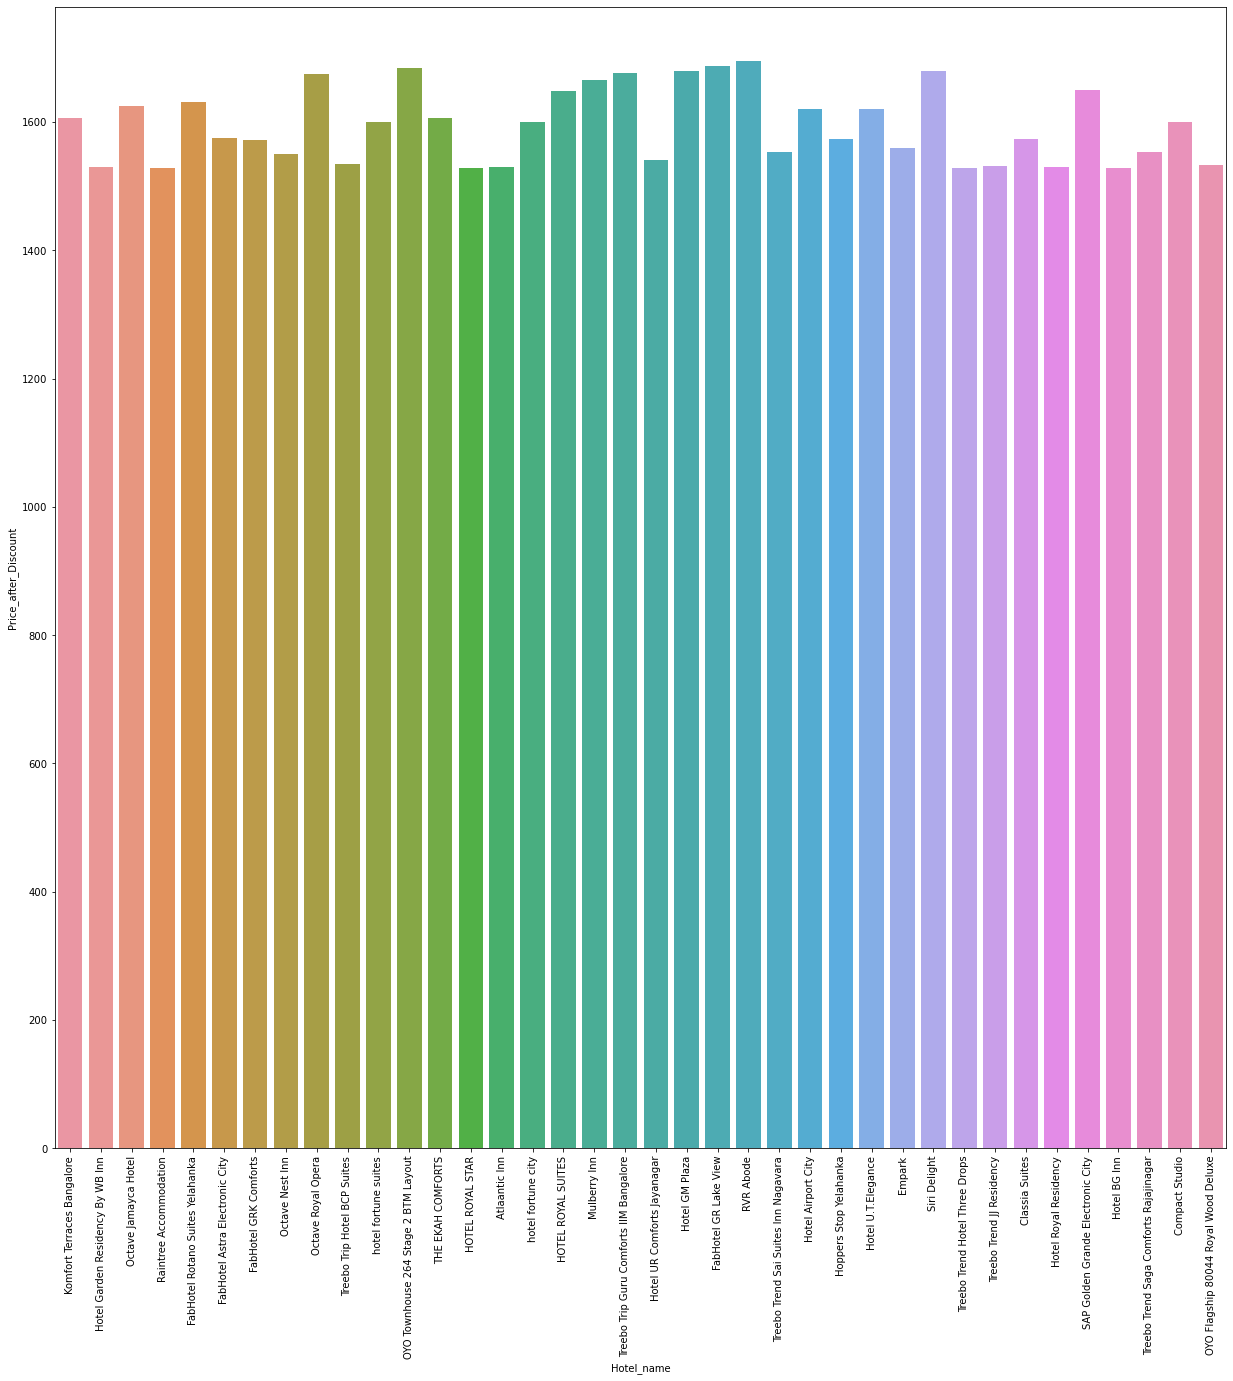

In [43]:
plt.figure(figsize=(21,21))
sns.barplot(Budget_wala_price3,Hotel_df['Price_after_Discount'])
plt.xticks(rotation=90)

# Hotel's between price of 1500 and 1700

In [44]:
Budget_wala_price4= Hotel_df[(Hotel_df['Price_after_Discount']>1700) & (Hotel_df['Price_after_Discount']<1900)]['Hotel_name']

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 [Text(0, 0, 'FabHotel BSR Inn - Fully Vaccinated Staff'),
  Text(1, 0, 'Capital O 46423 Clove Boutique Hotel Rajaji Nagar'),
  Text(2, 0, 'FabHotel Hiland Suites'),
  Text(3, 0, 'La Sara Vista Formerly Known as Nandhana Vista'),
  Text(4, 0, 'Hotel Monarch By Rivido, Bannerghatta Main Road'),
  Text(5, 0, 'Hotel G Grand'),
  Text(6, 0, 'OYO Townhouse 159 Sarjapur'),
  Text(7, 0, 'FabHotel The BTM Palace'),
  Text(8, 0, 'SPOT ON 86574 Shruthi Home'),
  Text(9, 0, 'Hotel Arafa Inn'),
  Text(10, 0, 'FabExpress Oriental Suites BTM Layout'),
  Text(11, 0, 'Jagadish Hotel Begur'),
  Text(12, 0, 'Dhruv Palace by JT Royal'),
  Text(13, 0, 'Hotel Monarch Stays Gandhi Nagar'),
  Text(14, 0, 'Treebo Trip Shree Comforts HSR Layout'),
  Text(15, 0, 'Treebo Trip Sri Sai Suites Vijaya Bank Layout'),
  Text(16, 0, 'Shoba Enclave-Kammanahalli'),
  Text(17, 0, 'Treebo Trip Royal Comfort Madiwala'),

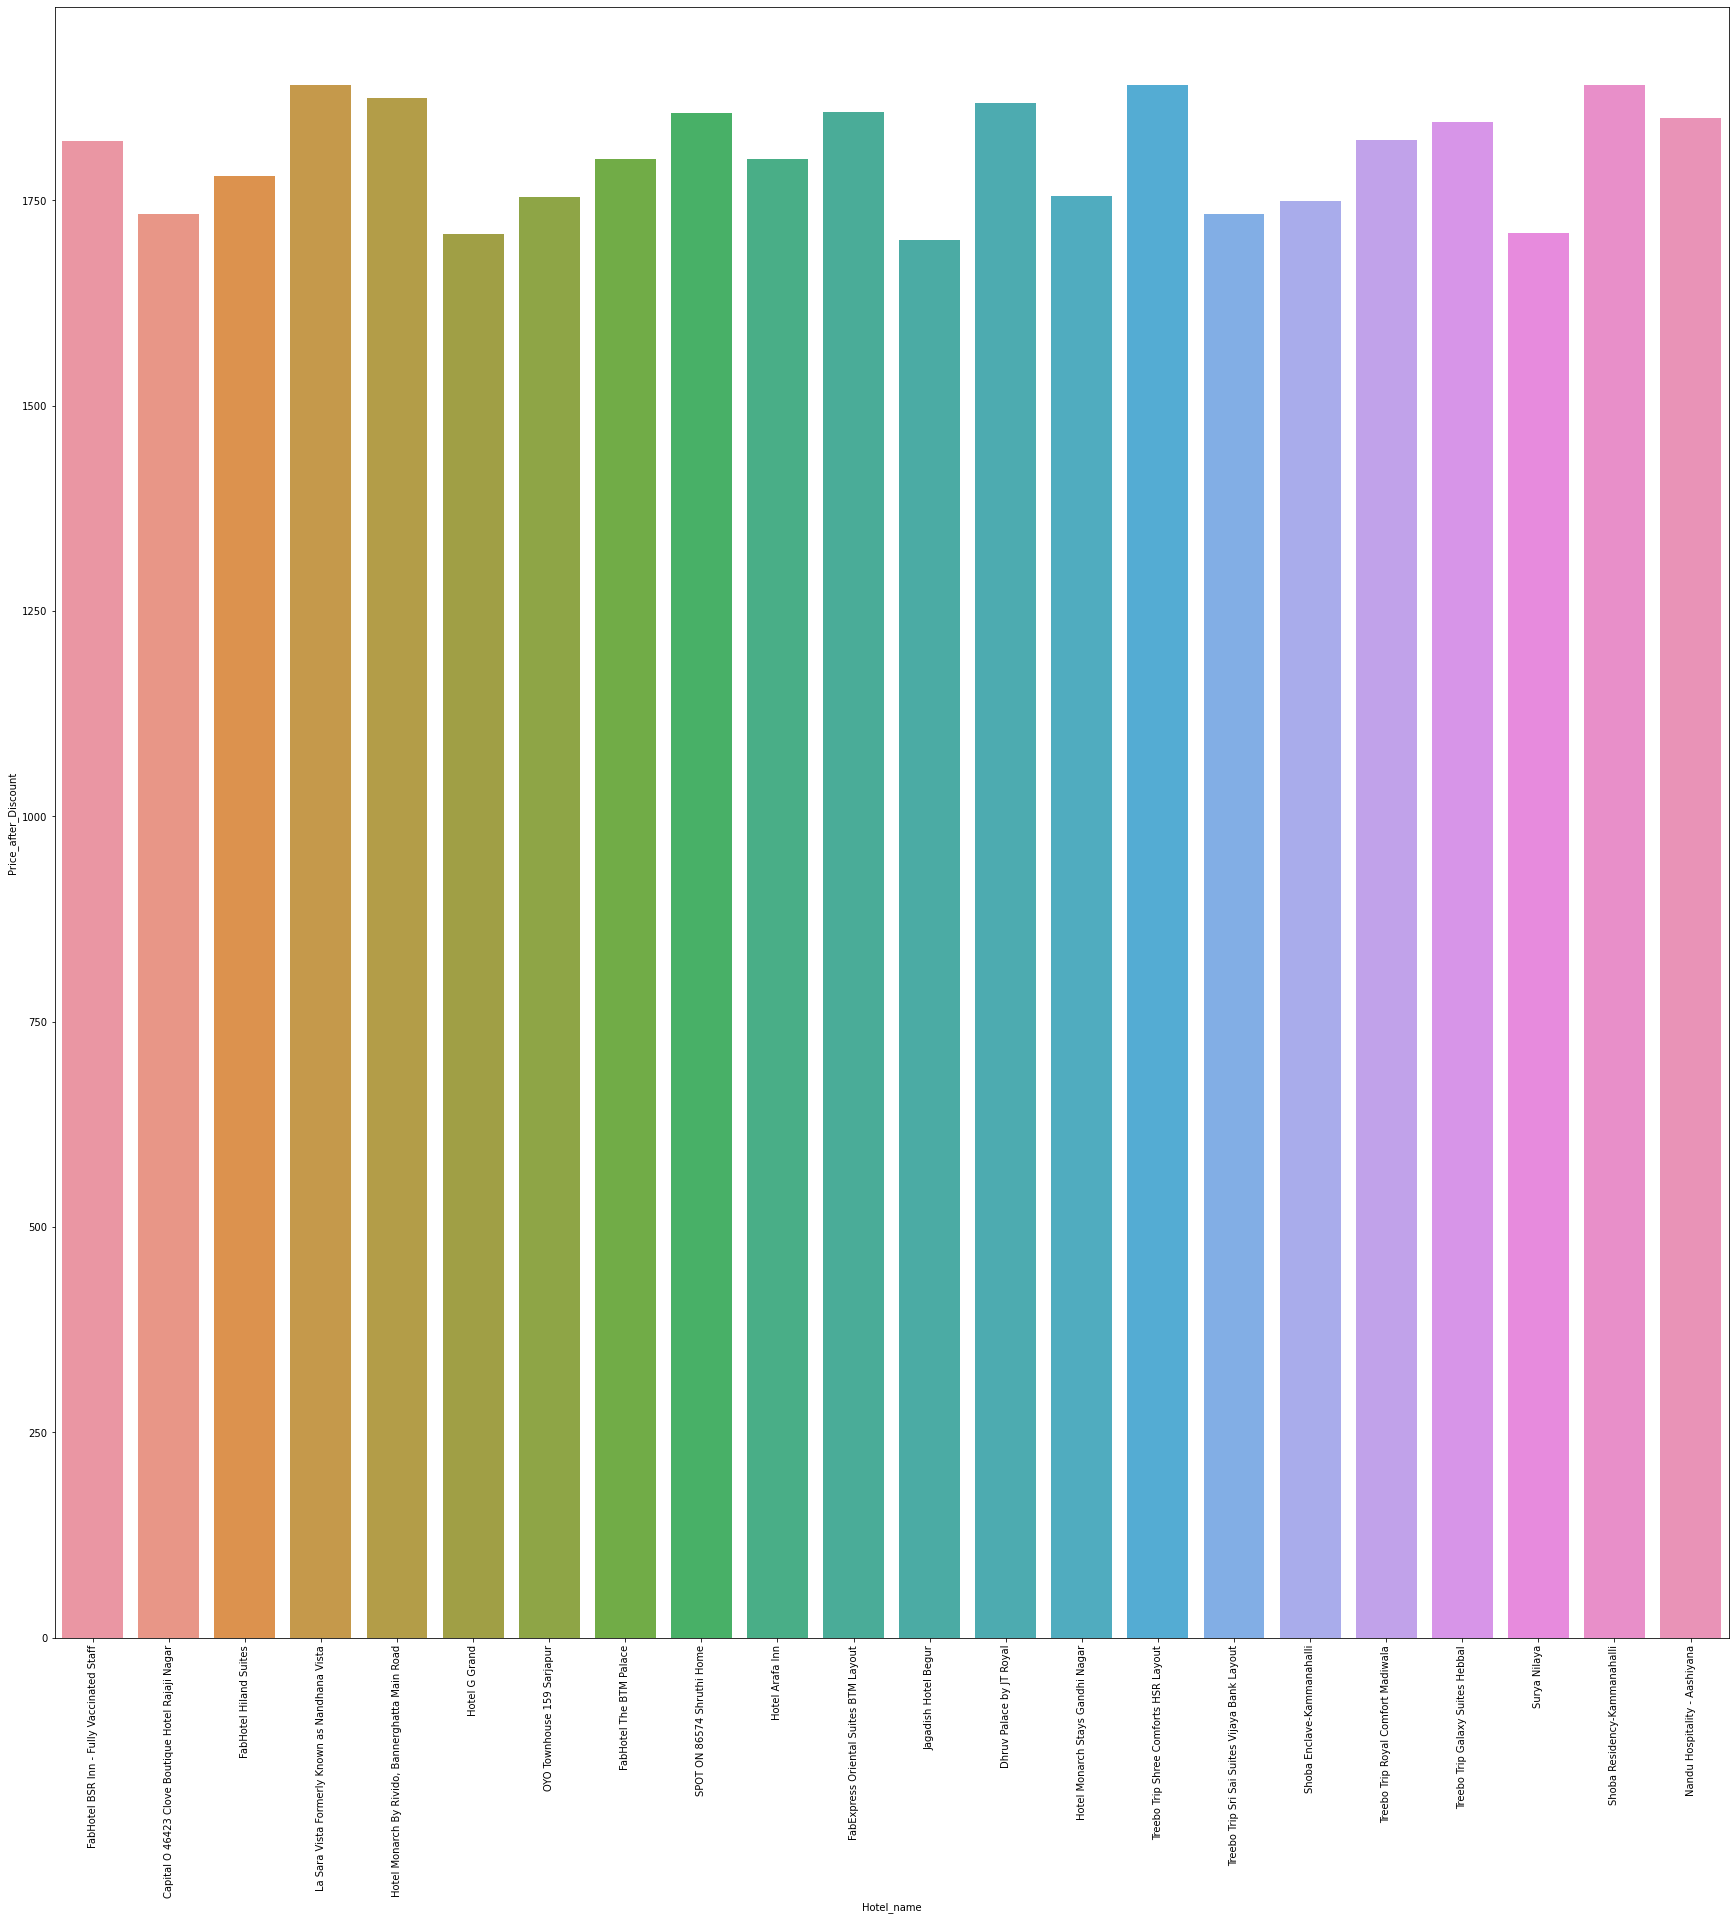

In [45]:
plt.figure(figsize=(30,30))
sns.barplot(Budget_wala_price4,Hotel_df['Price_after_Discount'])
plt.xticks(rotation=90)

# Hotel's between price of 1700 and 1900

In [46]:
Budget_wala_price5= Hotel_df[(Hotel_df['Price_after_Discount']>1900) & (Hotel_df['Price_after_Discount']<2100)]['Hotel_name']

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, 'Coraltree By Goldfinch Hotels Bangalore'),
  Text(1, 0, 'KSTDC KumaraKrupa Hotel'),
  Text(2, 0, 'Daffodil Delight'),
  Text(3, 0, 'The Green Path Eco Hotel'),
  Text(4, 0, 'FabHotel Crown Suites'),
  Text(5, 0, 'FabHotel Phoenix Resorts'),
  Text(6, 0, 'The Porch Inn Hotel/Service Apartments'),
  Text(7, 0, 'FabHotel Grand View'),
  Text(8, 0, 'FabHotel SRK Platinum Inn'),
  Text(9, 0, 'Manpho Bell Hotel & Convention Center'),
  Text(10, 0, 'Hotel Apple Suites'),
  Text(11, 0, 'Treebo Trend Hotel 12 Degrees West Domlur'),
  Text(12, 0, 'FabHotel Champion Gateway'),
  Text(13, 0, 'OYO Townhouse 238 Ulssor'),
  Text(14, 0, 'ABM Boutique Hotel by Purple Cloud'),
  Text(15, 0, 'Treebo Trip Dhanvitha Suites Bannerghatta Main Road'),
  Text(16, 0, 'Omatra Infantry Road'),
  Text(17, 0, 'Vajra Heritage'),
  Text(18, 0, 'Hotel Plaza Heights'),
  Text(19, 0, '

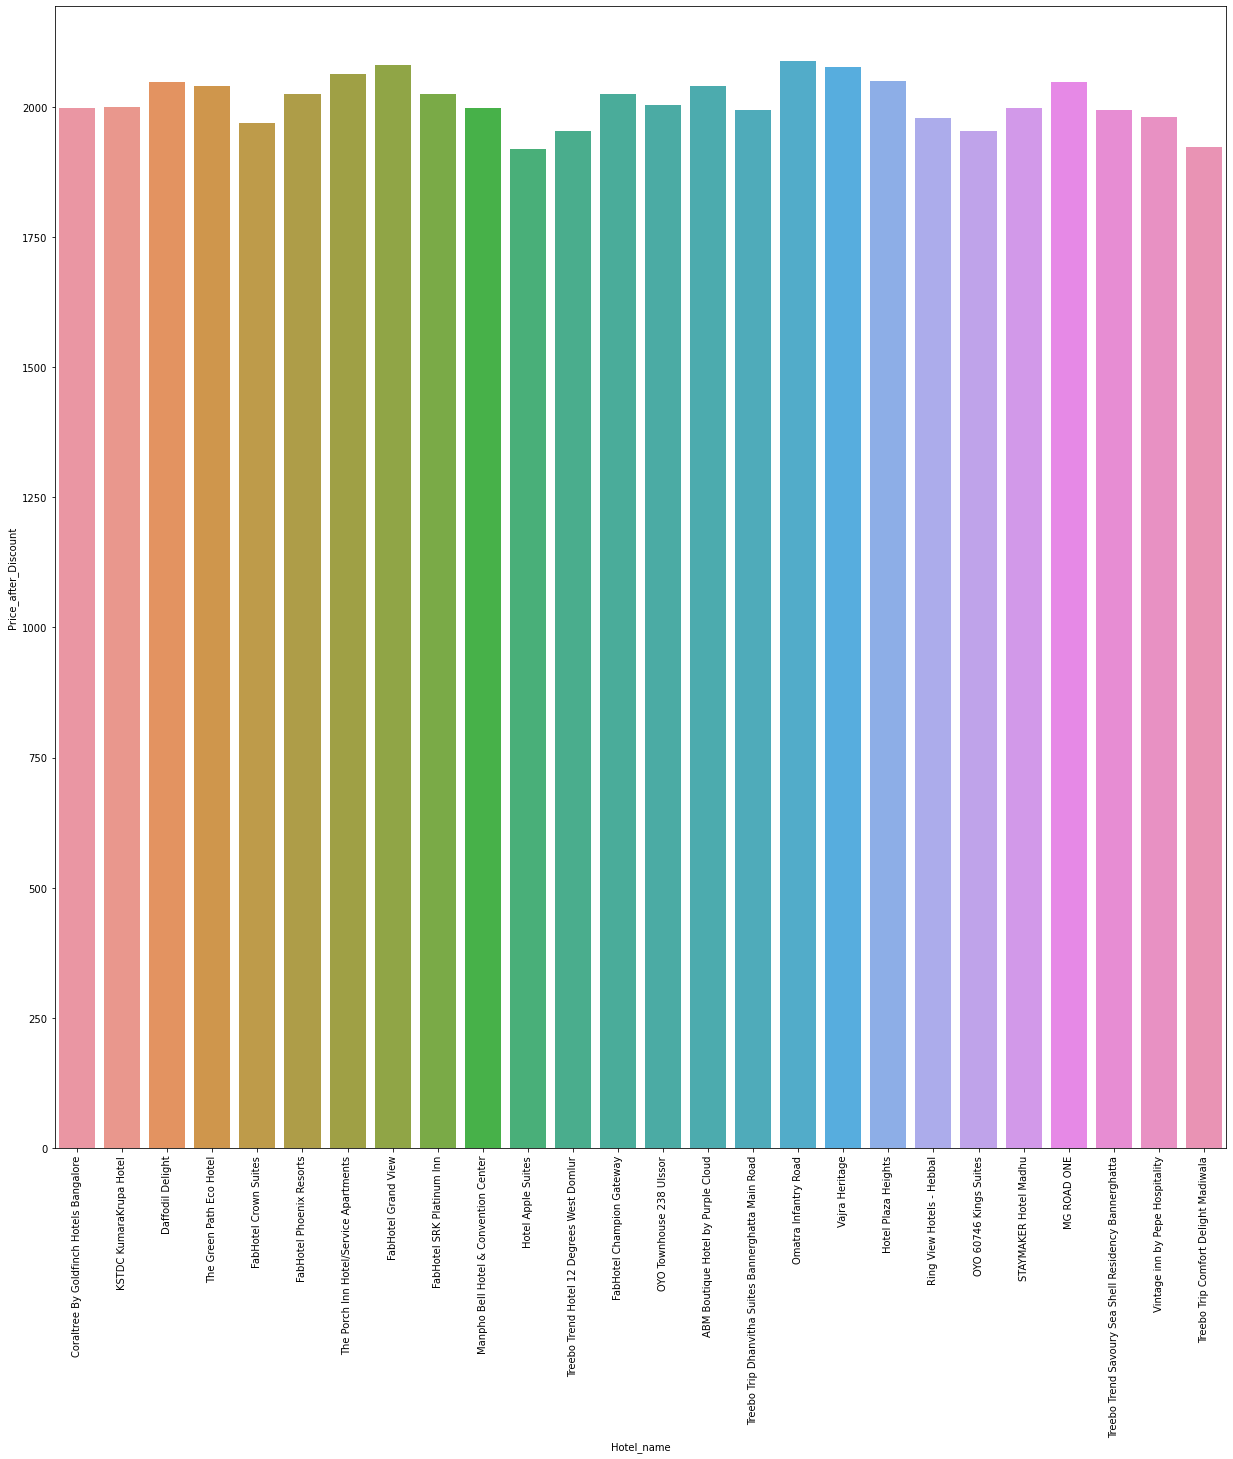

In [47]:
plt.figure(figsize=(21,21))
sns.barplot(Budget_wala_price5,Hotel_df['Price_after_Discount'])
plt.xticks(rotation=90)

# Hotel's between price of  1900 and 2100

In [48]:
Budget_wala_price6= Hotel_df[(Hotel_df['Price_after_Discount']>2100) & (Hotel_df['Price_after_Discount']<2400)]['Hotel_name']

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(0, 0, '4 SEASONS SUITES J.P. NAGAR'),
  Text(1, 0, 'FabHotel Phoenix'),
  Text(2, 0, 'MySpace Forest Keys'),
  Text(3, 0, 'Alchemy Suits'),
  Text(4, 0, 'goSTOPS Bengaluru'),
  Text(5, 0, 'FabHotel Sri Krishna Suites Bellandur - Fully Vaccinated Staff'),
  Text(6, 0, 'Treebo Trend Apple Villa Richmond Circle'),
  Text(7, 0, 'Treebo Trip Hotel Palm Emirates Tavarekere Main Road'),
  Text(8, 0, 'Hotel Royal Inn - Electronic City'),
  Text(9, 0, 'Octave Hotel & Spa - Marathahalli'),
  Text(10, 0, 'Fly Inn'),
  Text(11, 0, 'Treebo Trend Cocoon Suites Kalyan Nagar'),
  Text(12, 0, 'FabHotel Corporate Crown Koramangala - Fully Vaccinated Staff'),
  Text(13, 0, 'Hypons Hotel'),
  Text(14, 0, 'KR inn Manyata'),
  Text(15, 0, 'NestHotels Kormangala by Urban'),
  Text(16, 0, 'Shoba Elite'),
  Text(17, 0, 'Hotel Windsor Castle Inn Brigade Rd'),
  Text(18, 0, 'Treebo

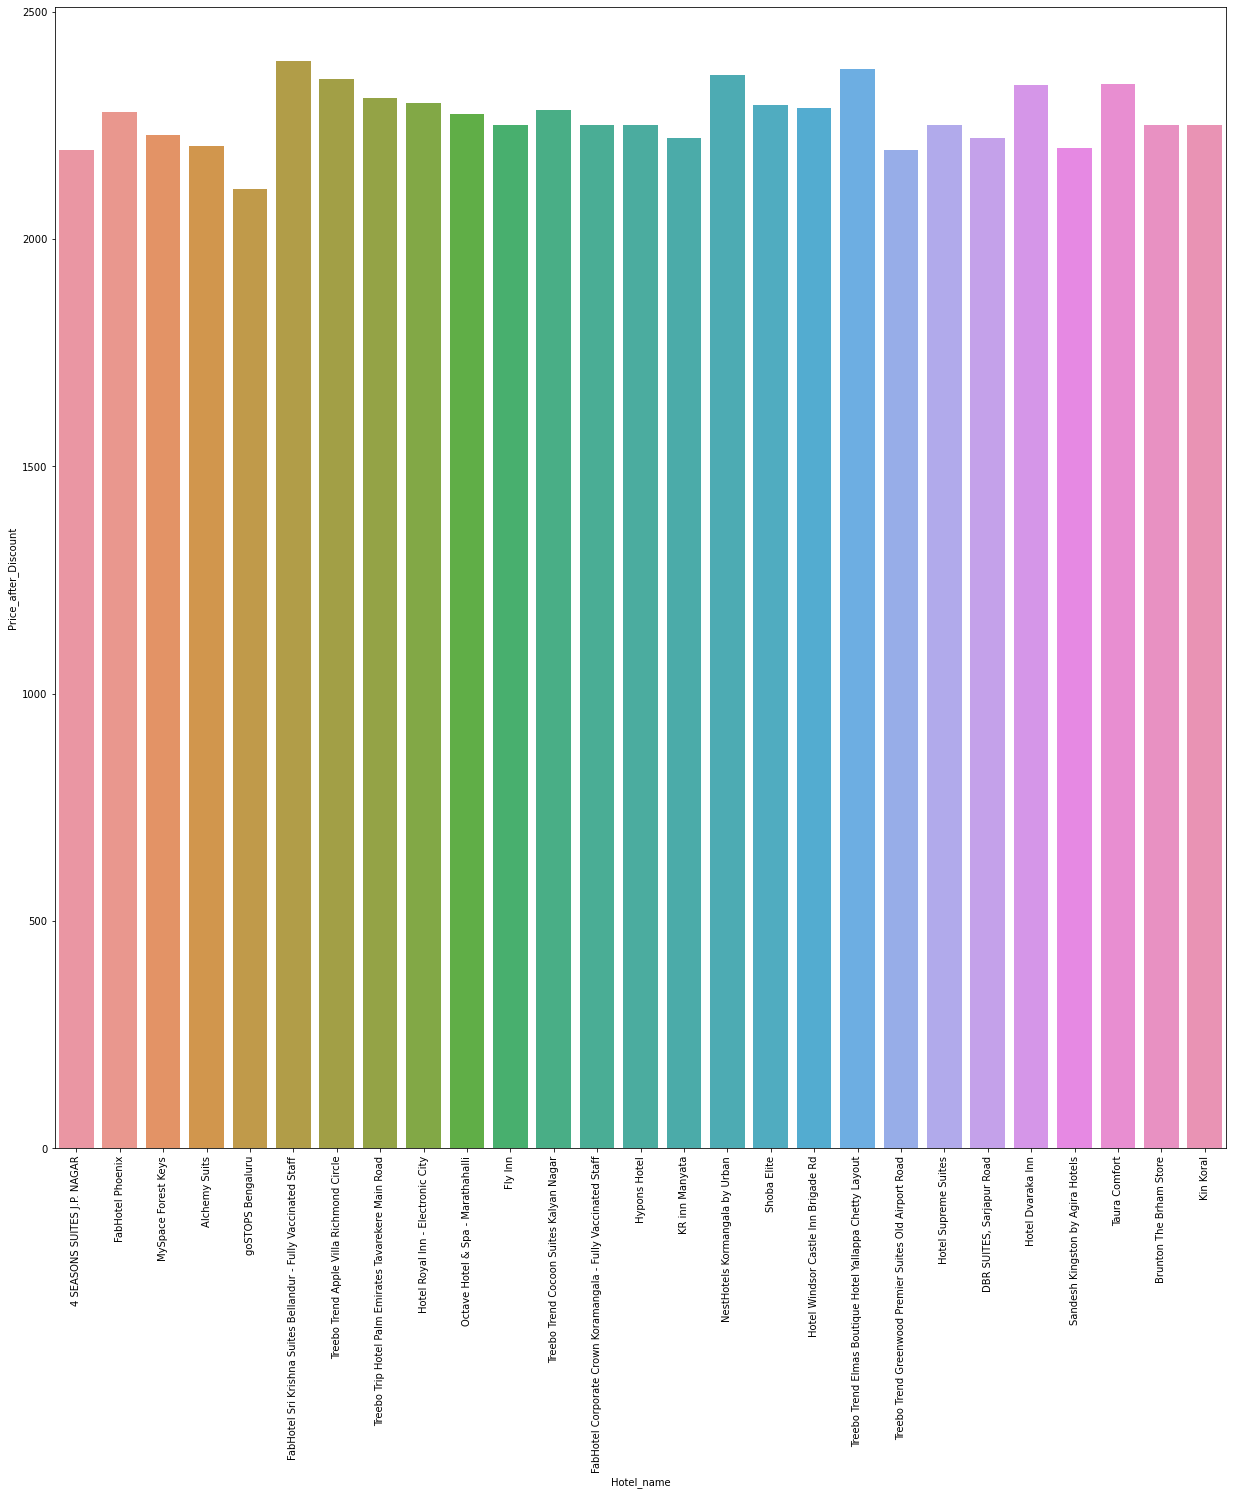

In [49]:
plt.figure(figsize=(21,21))
sns.barplot(Budget_wala_price6,Hotel_df['Price_after_Discount'])
plt.xticks(rotation=90)

 # Hotel's between price of  2100 and 2400

In [50]:
Budget_wala_price7= Hotel_df[(Hotel_df['Price_after_Discount']>2400) & (Hotel_df['Price_after_Discount']<2800)]['Hotel_name']

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 [Text(0, 0, 'Iris Suites'),
  Text(1, 0, 'Click Hotel Bangalore'),
  Text(2, 0, 'Eiffel Suites - Kammanahalli'),
  Text(3, 0, 'Hotel Bangalore Gate'),
  Text(4, 0, 'Octave Brookefield Suites'),
  Text(5, 0, 'Utse Suites'),
  Text(6, 0, 'Jagadish Hotel HSR'),
  Text(7, 0, 'JP Cordial Hotel'),
  Text(8, 0, 'Caramel Hotels'),
  Text(9, 0, 'MySpace Dhruva Inn'),
  Text(10, 0, 'X by Bloom I Hebbal Manyata Park'),
  Text(11, 0, 'Treebo Trend The Grand Skyla Marathahalli'),
  Text(12, 0, 'Hotel Foxglove International'),
  Text(13, 0, 'Ashraya International Hotel'),
  Text(14, 0, 'Treebo Trend Astor Hotel HSR Layout'),
  Text(15, 0, 'Treebo Trend Kozy Rooms HSR Layout'),
  Text(16, 0, 'Treebo Trend Edge St Marks Road'),
  Text(17, 0, 'Treebo Trend Hotel Raj Elegance Nagavara'),
  Text(18, 0, '4 Seasons

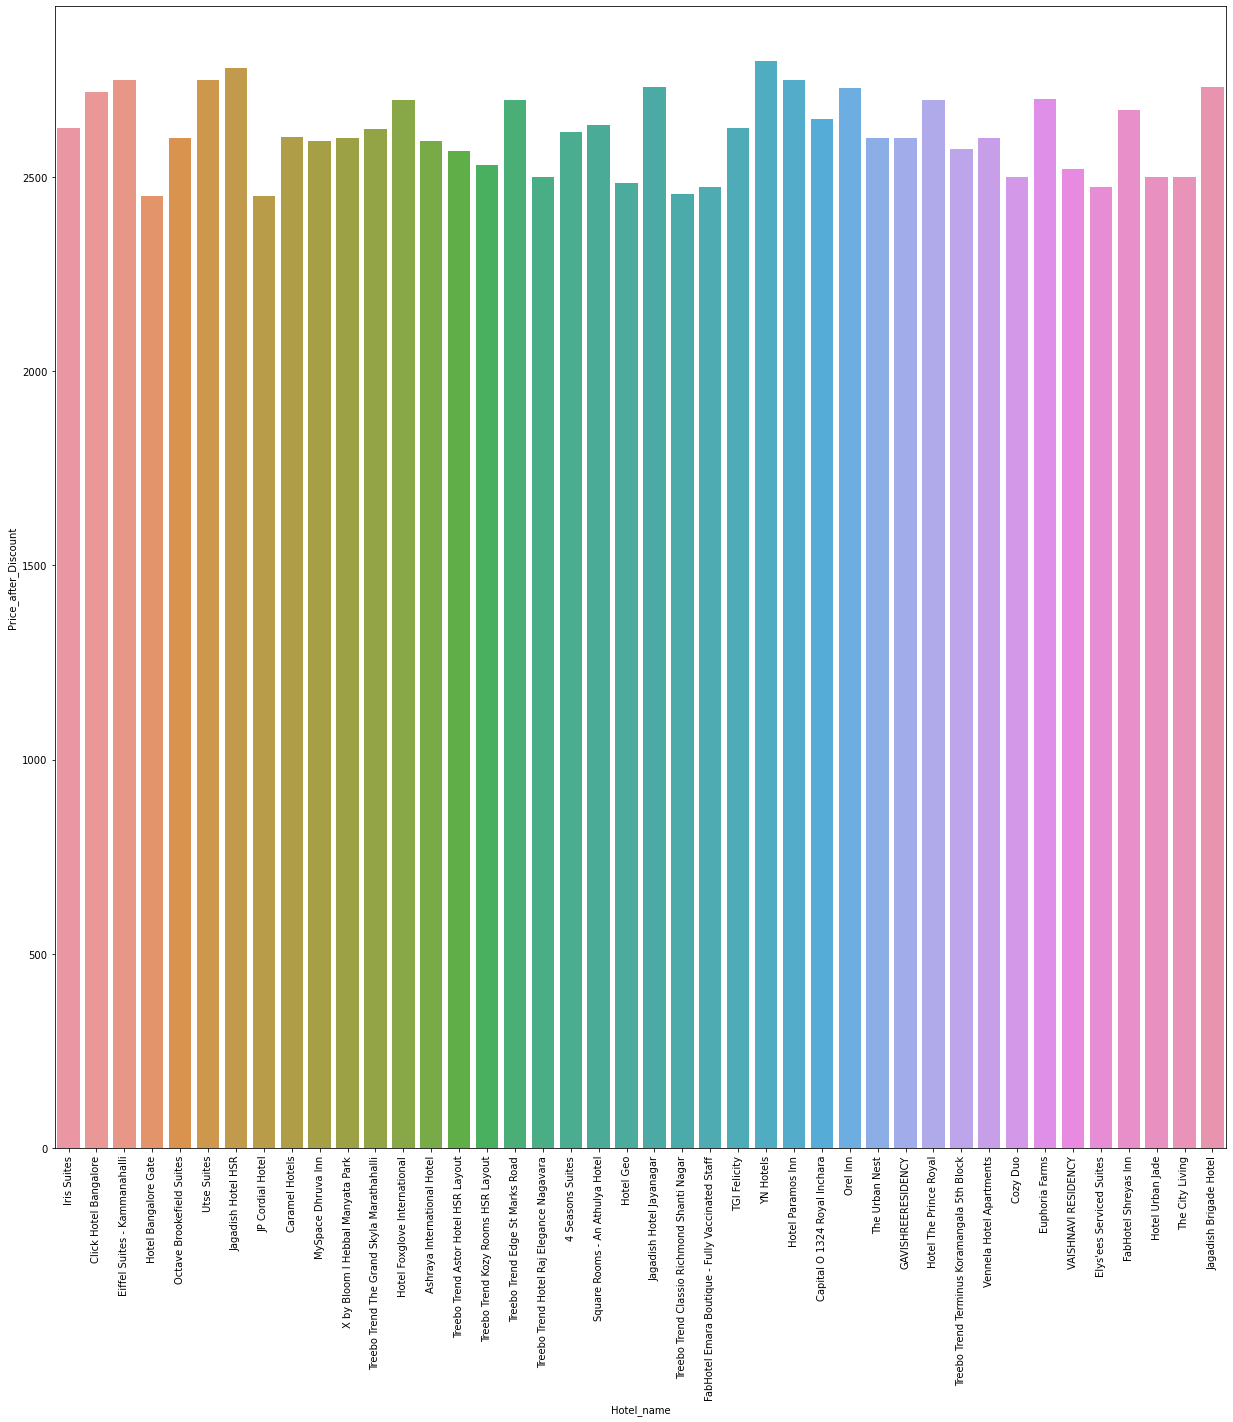

In [51]:
plt.figure(figsize=(21,21))
sns.barplot(Budget_wala_price7,Hotel_df['Price_after_Discount'])
plt.xticks(rotation=90)

# Hotel's between price of  2400 and 2800

In [52]:
Budget_wala_price8= Hotel_df[(Hotel_df['Price_after_Discount']>2800) & (Hotel_df['Price_after_Discount']<3200)]['Hotel_name']

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'FabHotel Krishna Boutique Marathahalli - Fully Vaccinated Staff'),
  Text(1, 0, 'Luxtay Suites'),
  Text(2, 0, 'Orchid Suites - A Boutique Hotel Bangalore Off Residency Road'),
  Text(3, 0, "Treebo Trend Paul'S Inn Koramangala"),
  Text(4, 0, 'Treebo Trend Stay Tuned JP Nagar'),
  Text(5, 0, 'Treebo Trend Hotel Suraksha Inn Indiranagar'),
  Text(6, 0, 'FabHotel Sri Udapi Park'),
  Text(7, 0, 'Treebo Trend Fortune Stay Indiranagar'),
  Text(8, 0, 'Nice Stay The Business Hotel'),
  Text(9, 0, 'FLORA SUITES'),
  Text(10, 0, 'Zip By Spree Hotels Whitefield'),
  Text(11, 0, 'Treebo Trend Hotel Sahara Suites Madiwala'),
  Text(12, 0, 'Treebo Trend Kings Suits HSR Layout'),
  Text(13, 0, 'The Nines Business Hotel'),
  Text(14, 0, 'Comet Hotel'),
  Text(15, 0, 'Hotel Presidency-Electronic City Phase II'),
  Text(16, 0, 'Livancia Ayra'),
  Text(17, 0, 'MySpace Hotels Silverstar'),

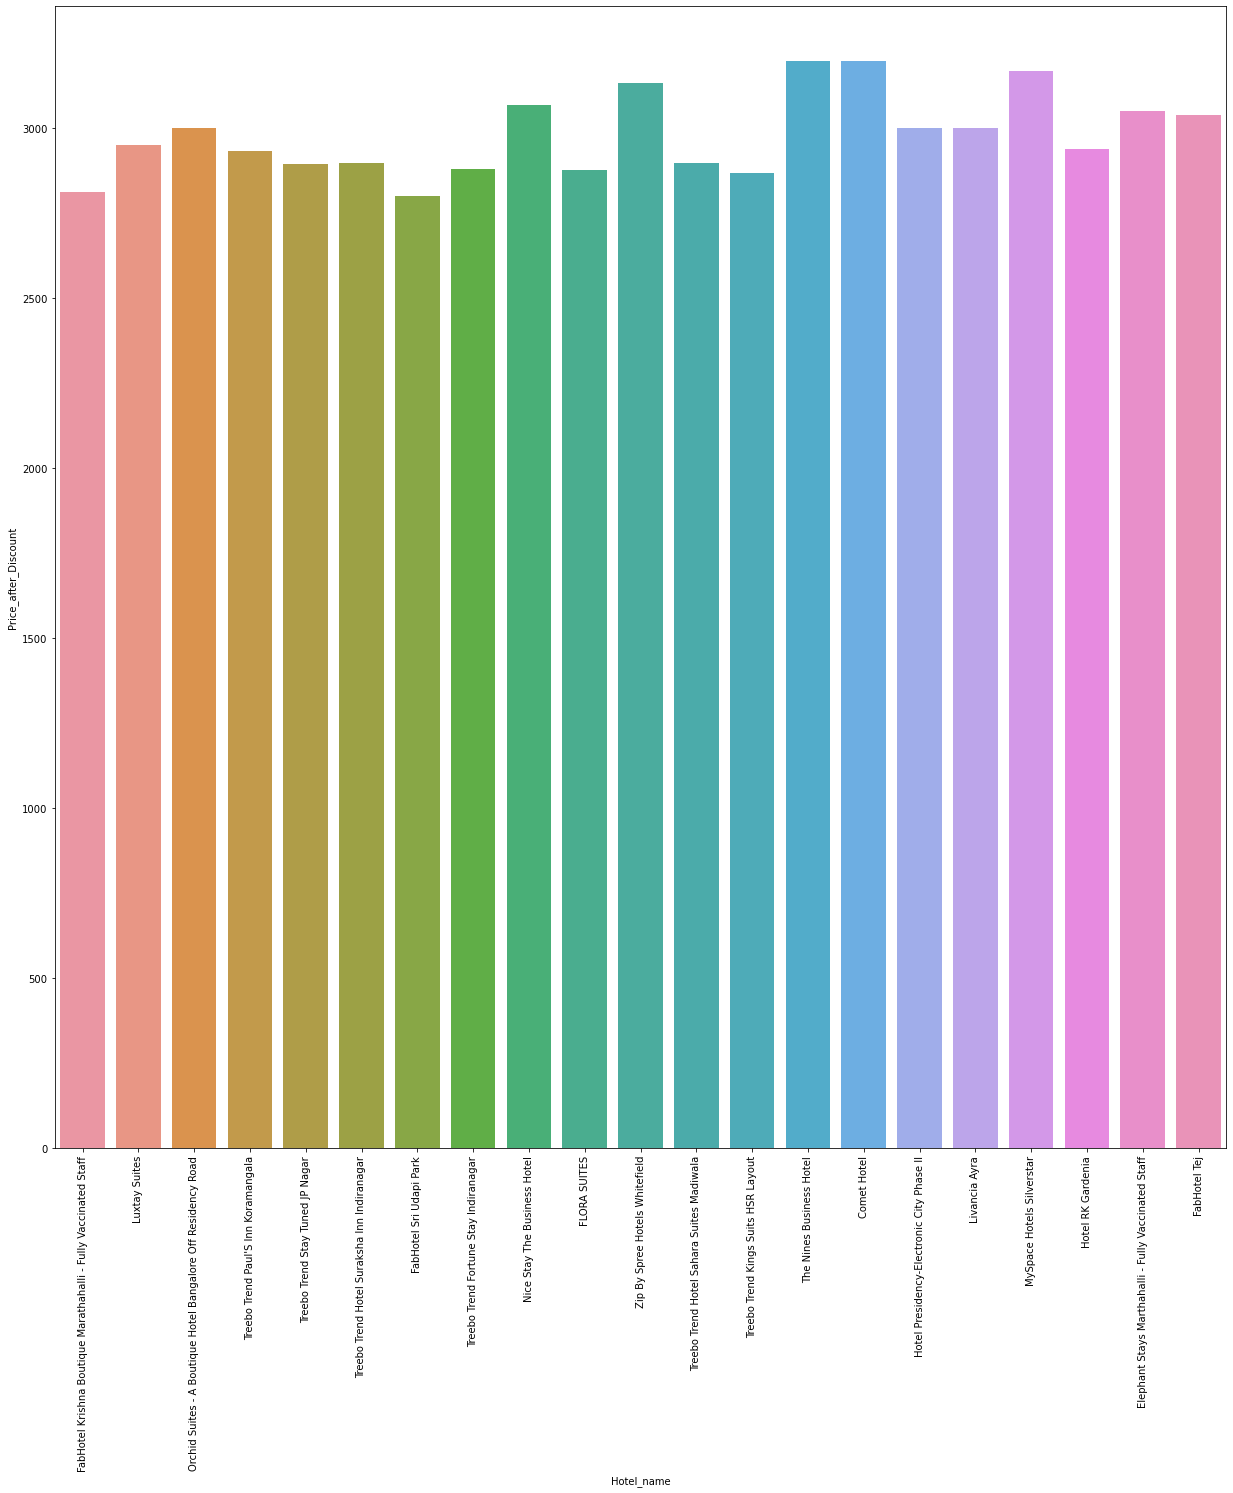

In [53]:
plt.figure(figsize=(21,21))
sns.barplot(Budget_wala_price8,Hotel_df['Price_after_Discount'])
plt.xticks(rotation=90)

# Hotel's between price of 2800 and 3200

In [54]:
Budget_wala_price9= Hotel_df[(Hotel_df['Price_after_Discount']>3200) & (Hotel_df['Price_after_Discount']<4000)]['Hotel_name']

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]),
 [Text(0, 0, 'Octave Hotel & Spa - Sarjapur Road'),
  Text(1, 0, 'The Royale Senate, Hebbal, Bengaluru'),
  Text(2, 0, 'Casa Cottage'),
  Text(3, 0, 'De Venetian by TGI'),
  Text(4, 0, 'Goldfinch Hotel Bangalore'),
  Text(5, 0, 'V One Hotel-Ambara Elite'),
  Text(6, 0, 'Icon Suites by Bhagini'),
  Text(7, 0, 'Monarch Brigade Road'),
  Text(8, 0, 'Zion - A Luxurious Hotel'),
  Text(9, 0, 'Treebo Trip Hotel Worldtree Bellandur'),
  Text(10, 0, 'BloomSuites I Electronics City'),
  Text(11, 0, 'Mastiff Infantry Bengaluru'),
  Text(12, 0, 'Empire International Church Street'),
  Text(13, 0, 'Radiant Resort'),
  Text(14, 0, 'MySpace Triton Suites'),
  Text(15, 0, 'Ginger Bangalore- Inner Ring Road'),
  Text(16, 0, 'Radha Hometel'),
  Text(17, 0, 'Liwa - The Transit Hotel, Bengaluru'),
  Text(18, 0, 'Evoma'),
  Text(19, 0, 'VEERD

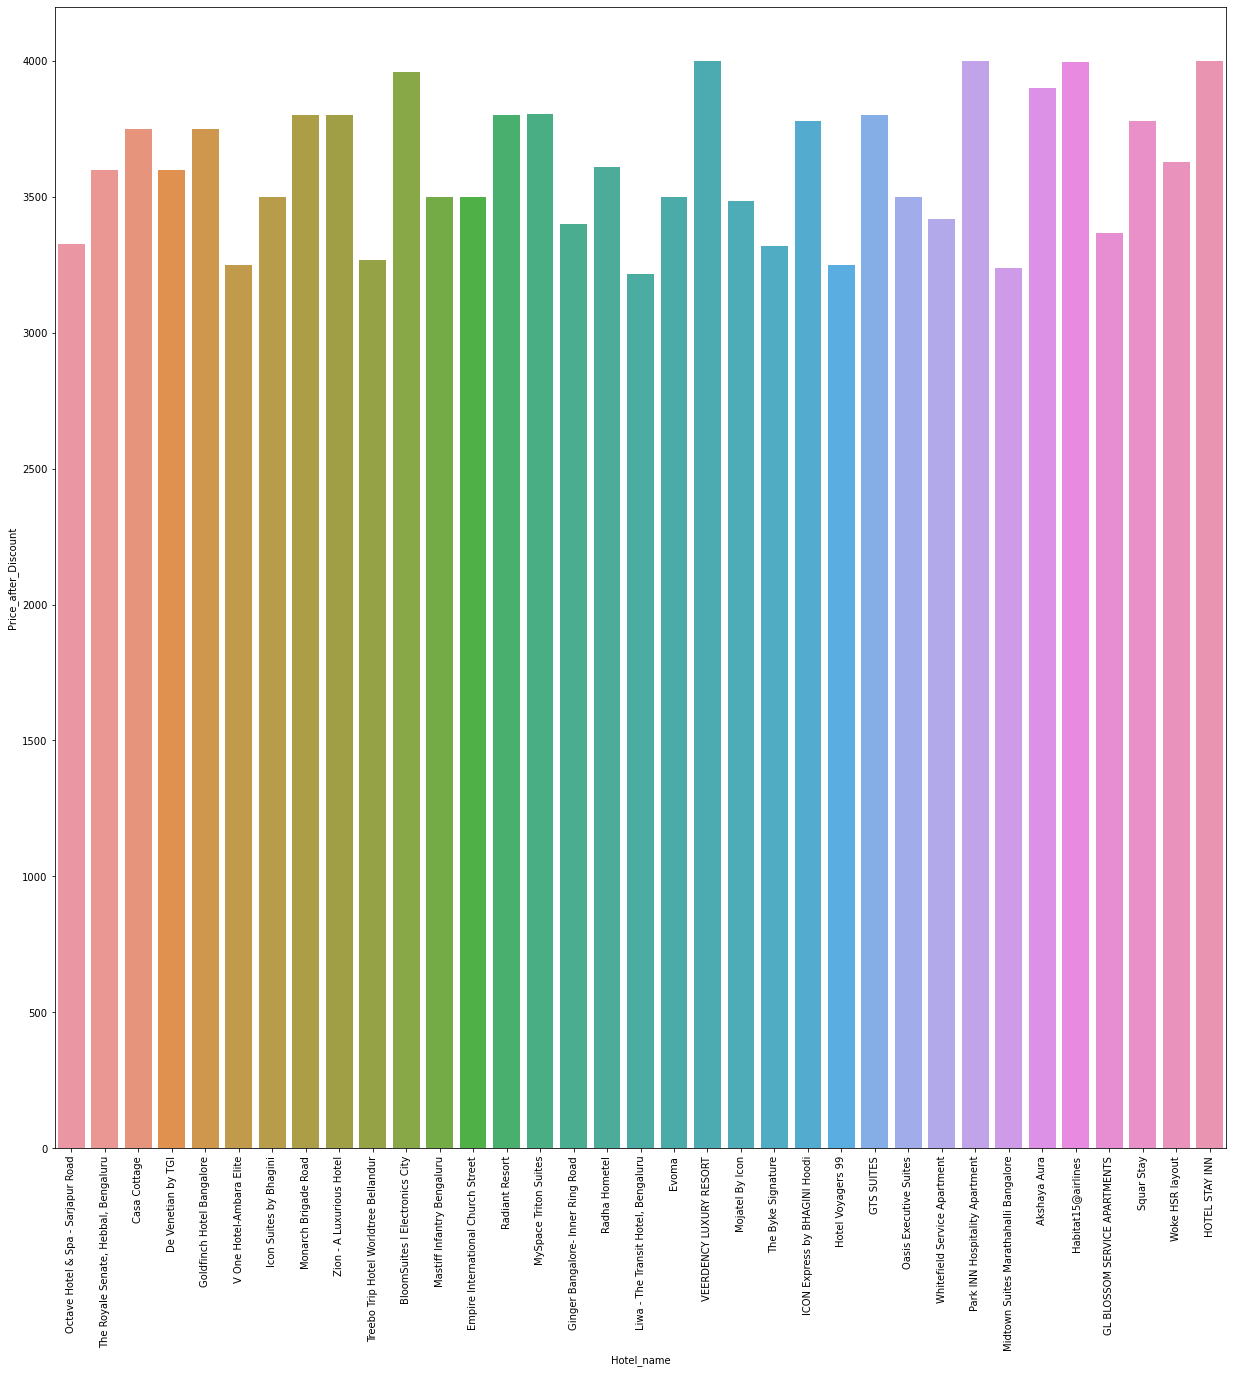

In [55]:
plt.figure(figsize=(21,21))
sns.barplot(Budget_wala_price9,Hotel_df['Price_after_Discount'])
plt.xticks(rotation=90)

# Hotel's between price of  3200 and 4000

In [56]:
Thoda_Expensive= Hotel_df[(Hotel_df['Price_after_Discount']>4000) & (Hotel_df['Price_after_Discount']<6000)]['Hotel_name']

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 [Text(0, 0, 'ibis Bengaluru Hosur Road - An Accor Brand'),
  Text(1, 0, 'ibis Bengaluru City Centre - An Accor Brand'),
  Text(2, 0, 'The Chancery Hotel'),
  Text(3, 0, 'The Elanza Hotel, Bangalore'),
  Text(4, 0, 'Fairfield by Marriott Bengaluru Rajajinagar'),
  Text(5, 0, 'Holiday Inn Express & Suites Bengaluru Old Madras Road, an IHG Hotel'),
  Text(6, 0, 'Aloft Bengaluru Whitefield'),
  Text(7, 0, 'Ginger Bangalore- Whitefield'),
  Text(8, 0, 'Hotel Ballal Residency'),
  Text(9, 0, 'Vividus'),
  Text(10, 0, 'Fortune Park JP Celestial - Member ITC Hotel Group, Bengaluru'),
  Text(11, 0, 'Iris Hotel & Spa'),
  Text(12, 0, 'Adarsh Hamilton'),
  Text(13, 0, 'Hotel Empire International Kormangala'),
  Text(14, 0, 'Tulip Inn Koramangala'),
  Text(15, 0, 'SREE PARIJATHA

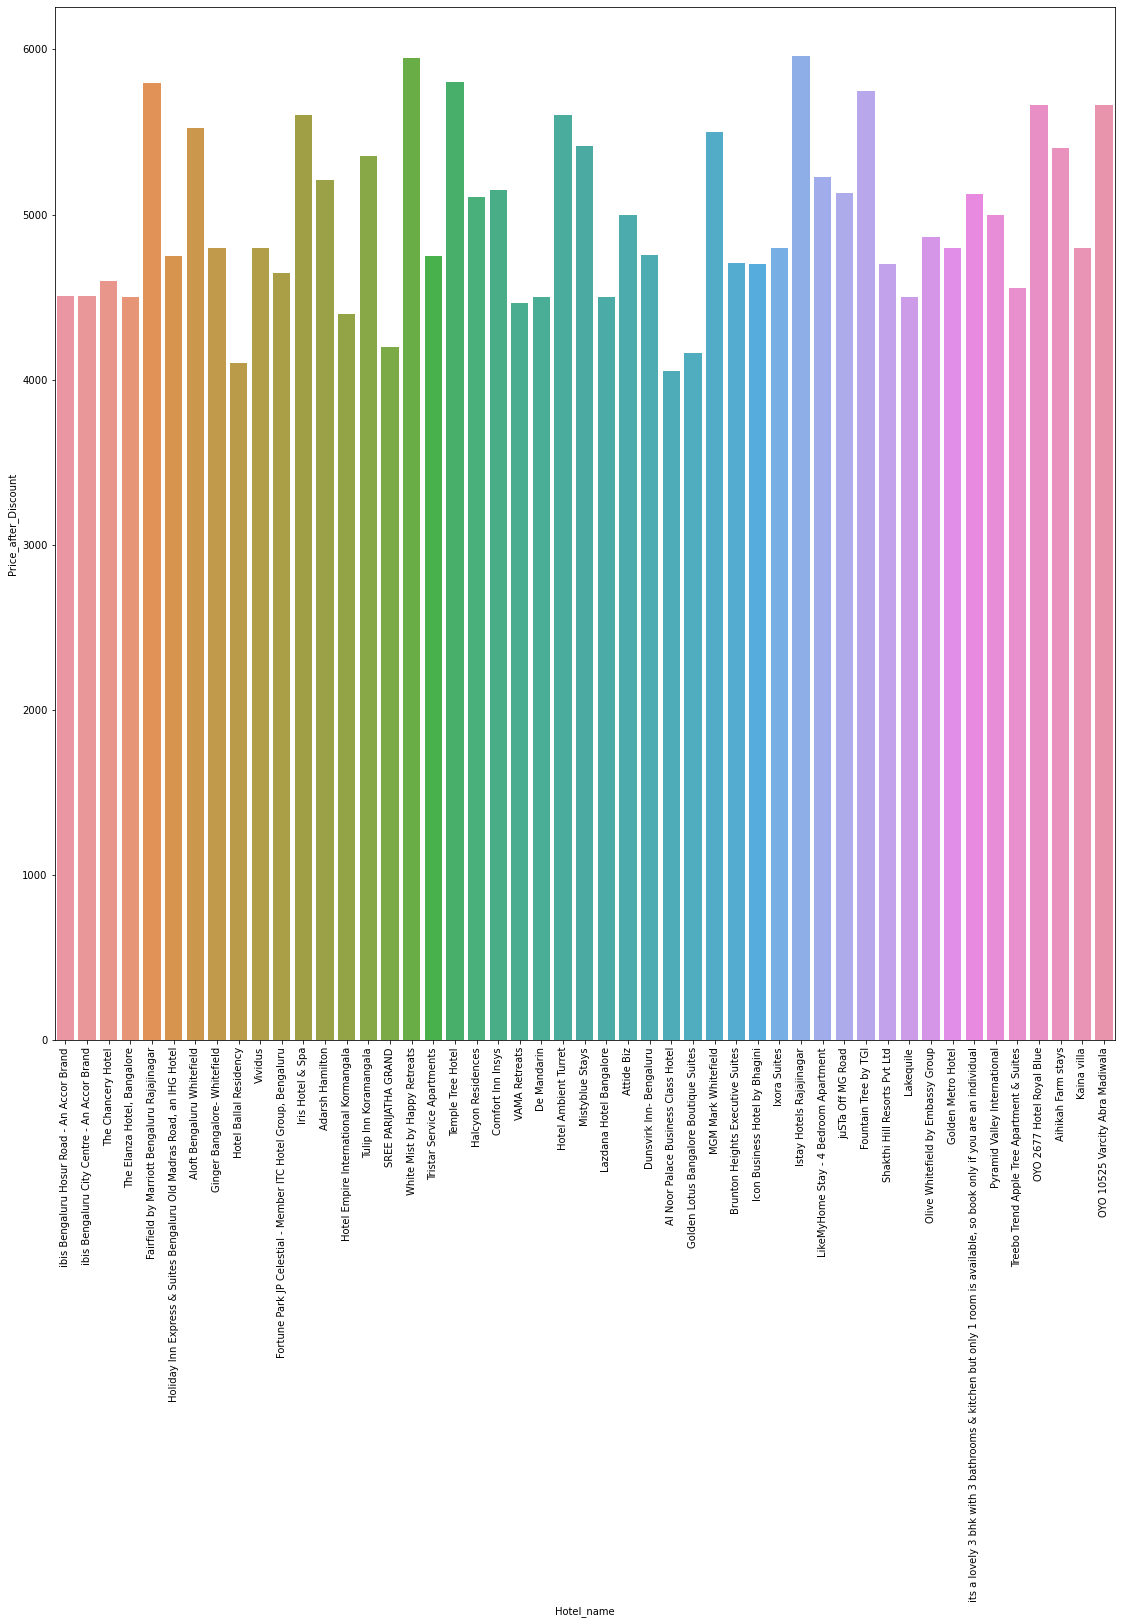

In [57]:
plt.figure(figsize=(19,19))
sns.barplot(Thoda_Expensive,Hotel_df['Price_after_Discount'])
plt.xticks(rotation=90)

# Hotel's between price of  4000 and 6000

In [58]:
Thoda_Expensive2= Hotel_df[(Hotel_df['Price_after_Discount']>6000) & (Hotel_df['Price_after_Discount']<10000)]['Hotel_name']

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]),
 [Text(0, 0, 'Aloft Bengaluru Cessna Business Park'),
  Text(1, 0, 'Holiday Inn Bengaluru Racecourse, an IHG Hotel'),
  Text(2, 0, 'Hyatt Centric MG Road Bangalore'),
  Text(3, 0, 'Pinnacle Serviced Apartments'),
  Text(4, 0, 'Grand Mercure Bengaluru at Gopalan Mall - An Accor Brand'),
  Text(5, 0, 'Four Points by Sheraton Bengaluru Whitefield'),
  Text(6, 0, 'Radisson Blu Bengaluru Outer Ring Road'),
  Text(7, 0, 'Radisson Blu Atria Bengaluru'),
  Text(8, 0, 'Vivanta Bengaluru, Whitefield'),
  Text(9, 0, 'Hotel Royal Orchid Bangalore'),
  Text(10, 0, 'Radha Regent Electronic City'),
  Text(11, 0, 'Fairfield by Marriott Bengaluru Outer Ring Road'),
  Text(12, 0, 'DoubleTree Suites by Hilton Bangalore'),
  Text(13, 0, 'Hilton Bangalore Embassy GolfLinks'),
  Text(14, 0, 'Sterlings Mac Hotel & Suites'),
  Text(15, 0, 'Fa

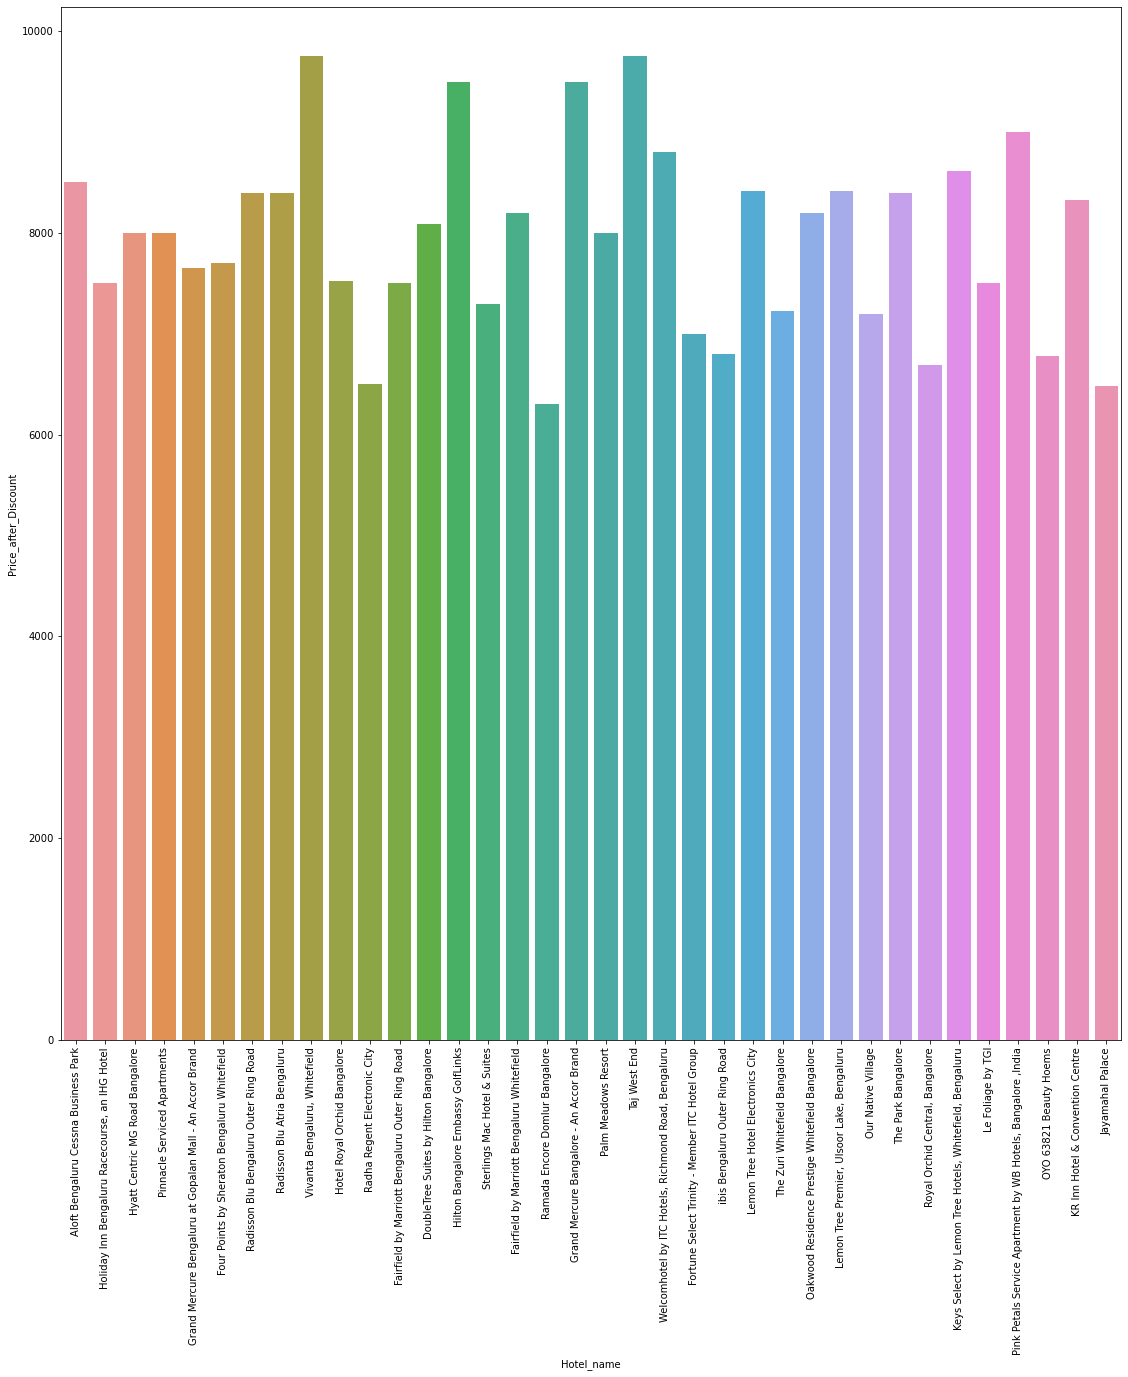

In [59]:
plt.figure(figsize=(19,19))
sns.barplot(Thoda_Expensive2,Hotel_df['Price_after_Discount'])
plt.xticks(rotation=90)

# Hotel's between price of 6000 and 10000

In [60]:
Expensive= Hotel_df[(Hotel_df['Price_after_Discount']>10000) & (Hotel_df['Price_after_Discount']<20000)]['Hotel_name']

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Sheraton Grand Bengaluru Whitefield Hotel & Convention Center'),
  Text(1, 0, 'Bengaluru Marriott Hotel Whitefield'),
  Text(2, 0, 'Oakwood Premier Prestige Bangalore'),
  Text(3, 0, 'The Ritz - Carlton, Bangalore'),
  Text(4, 0, 'JW Marriott Hotel Bengaluru'),
  Text(5, 0, 'Four Seasons Hotel Bengaluru at Embassy ONE'),
  Text(6, 0, 'ITC Windsor, a Luxury Collection Hotel, Bengaluru'),
  Text(7, 0, 'Shangri-La Bengaluru'),
  Text(8, 0, 'The Oberoi Bengaluru'),
  Text(9, 0, 'The Leela Bhartiya City Bengaluru'),
  Text(10, 0, 'Taj Yeshwantpur Bengaluru'),
  Text(11, 0, 'The Leela Palace Bengaluru'),
  Text(12, 0, 'Conrad Bengaluru'),
  Text(13, 0, 'The Den, Bengaluru'),
  Text(14, 0, 'Keys Select by Lemon Tree Hotels, Hosur Road, Bengaluru'),
  Text(15, 0, 'TEST hotel')])

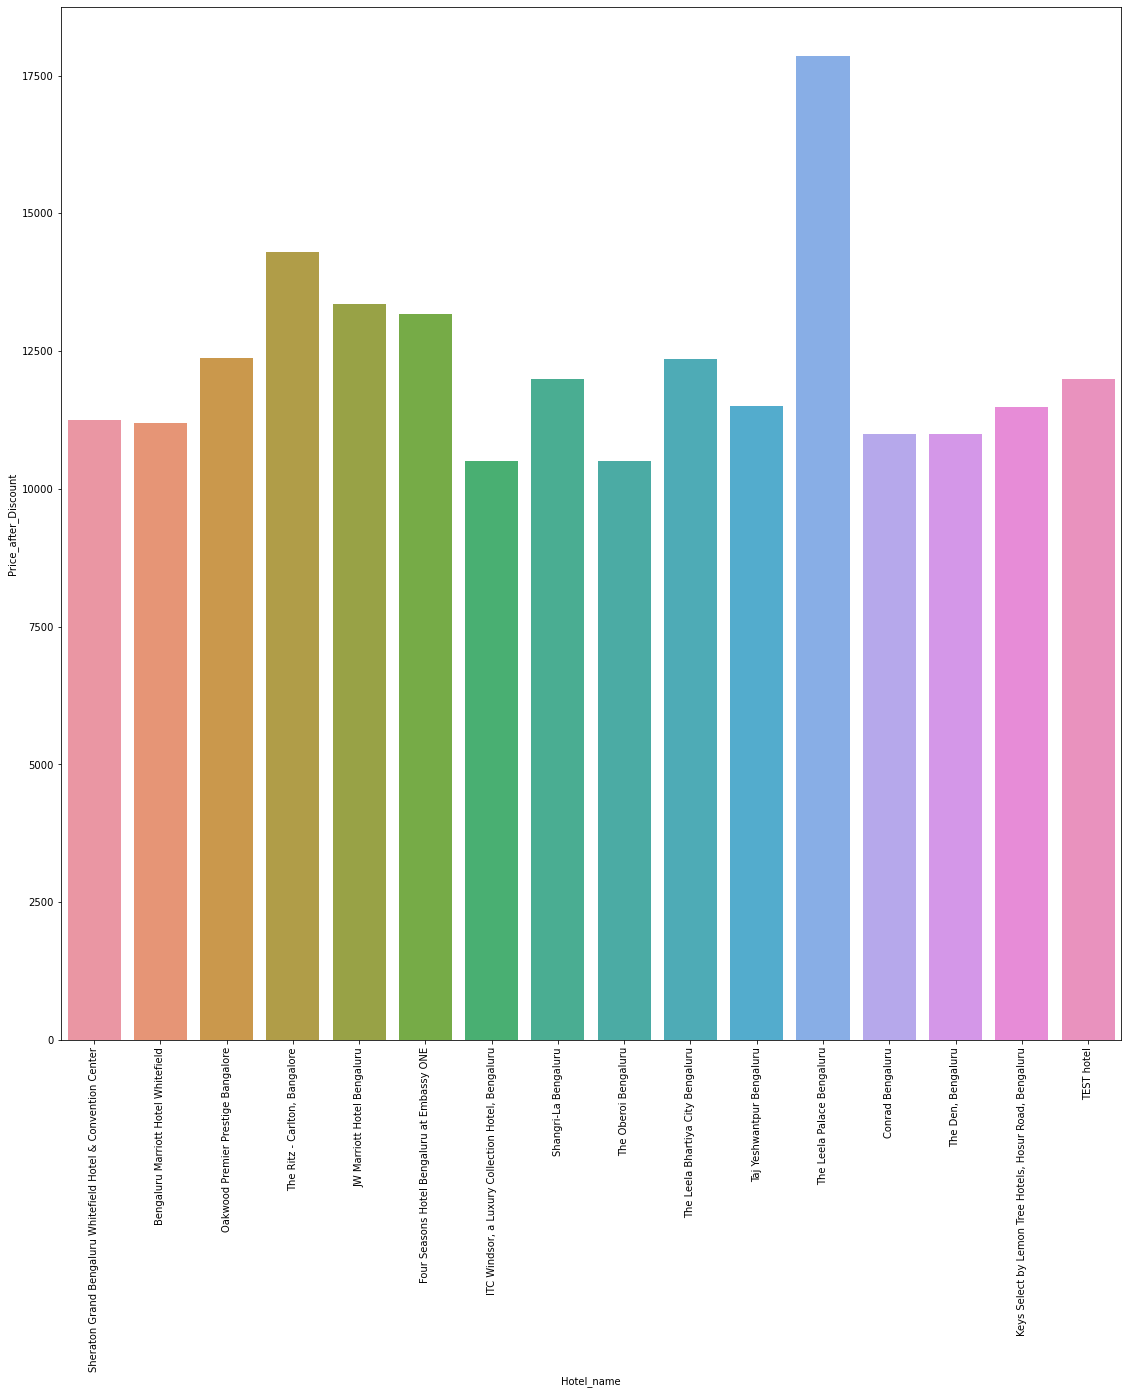

In [61]:
plt.figure(figsize=(19,19))
sns.barplot(Expensive,Hotel_df['Price_after_Discount'])
plt.xticks(rotation=90)

# Hotel's between price of  10000 amd 20000

In [62]:
Expensive2= Hotel_df[(Hotel_df['Price_after_Discount']>20000) & (Hotel_df['Price_after_Discount']<46000)]['Hotel_name']

(array([0, 1]),
 [Text(0, 0, 'StayVista at Ananta'), Text(1, 0, 'White Sky Villa')])

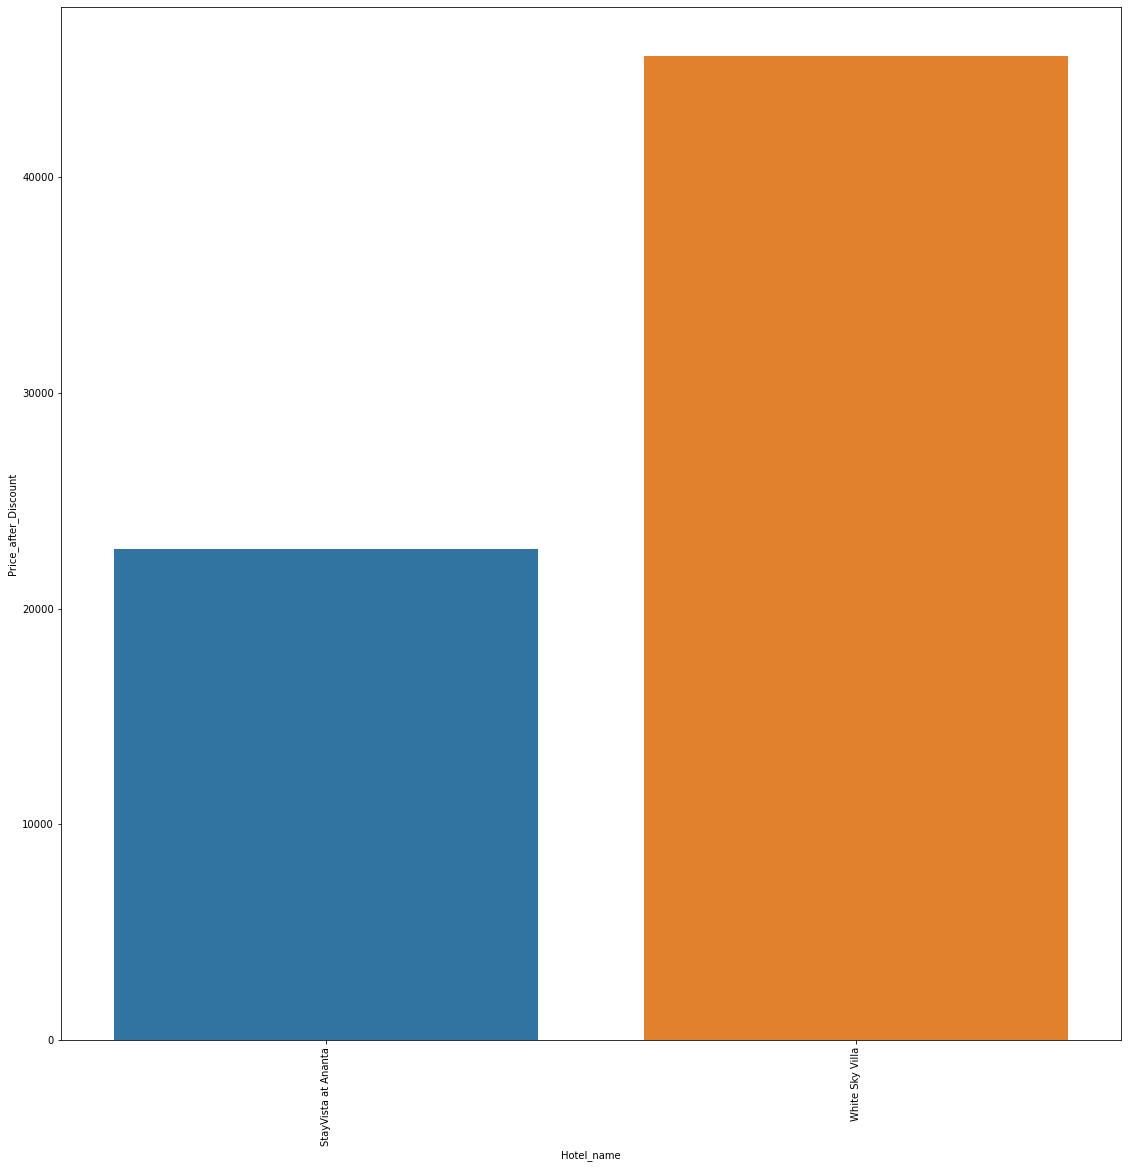

In [63]:
plt.figure(figsize=(19,19))
sns.barplot(Expensive2,Hotel_df['Price_after_Discount'])
plt.xticks(rotation=90)

# Hotel's between price of 20000 and 40000

### Checking Hotel's and thier Ratings

In [64]:
low_rating= Hotel_df[(Hotel_df['Rating']>0) & (Hotel_df['Rating']<3.0)]['Hotel_name']

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'OYO 87278 Royal Grand Residency'),
  Text(1, 0, 'OYO 46067 Sree Lakshmi Residency'),
  Text(2, 0, 'OYO 88840 Mn Residency'),
  Text(3, 0, 'SPOT ON 86574 Shruthi Home'),
  Text(4, 0, 'OYO 10293 Rajmahal Comforts'),
  Text(5, 0, 'Cozy Duo'),
  Text(6, 0, 'SPOT ON 79742 Sri Sai Grand In 2'),
  Text(7, 0, 'OYO 85096 Sammilana Comforts'),
  Text(8, 0, 'Collection O 40090 Vittala Comfort'),
  Text(9, 0, 'Sai sadan')])

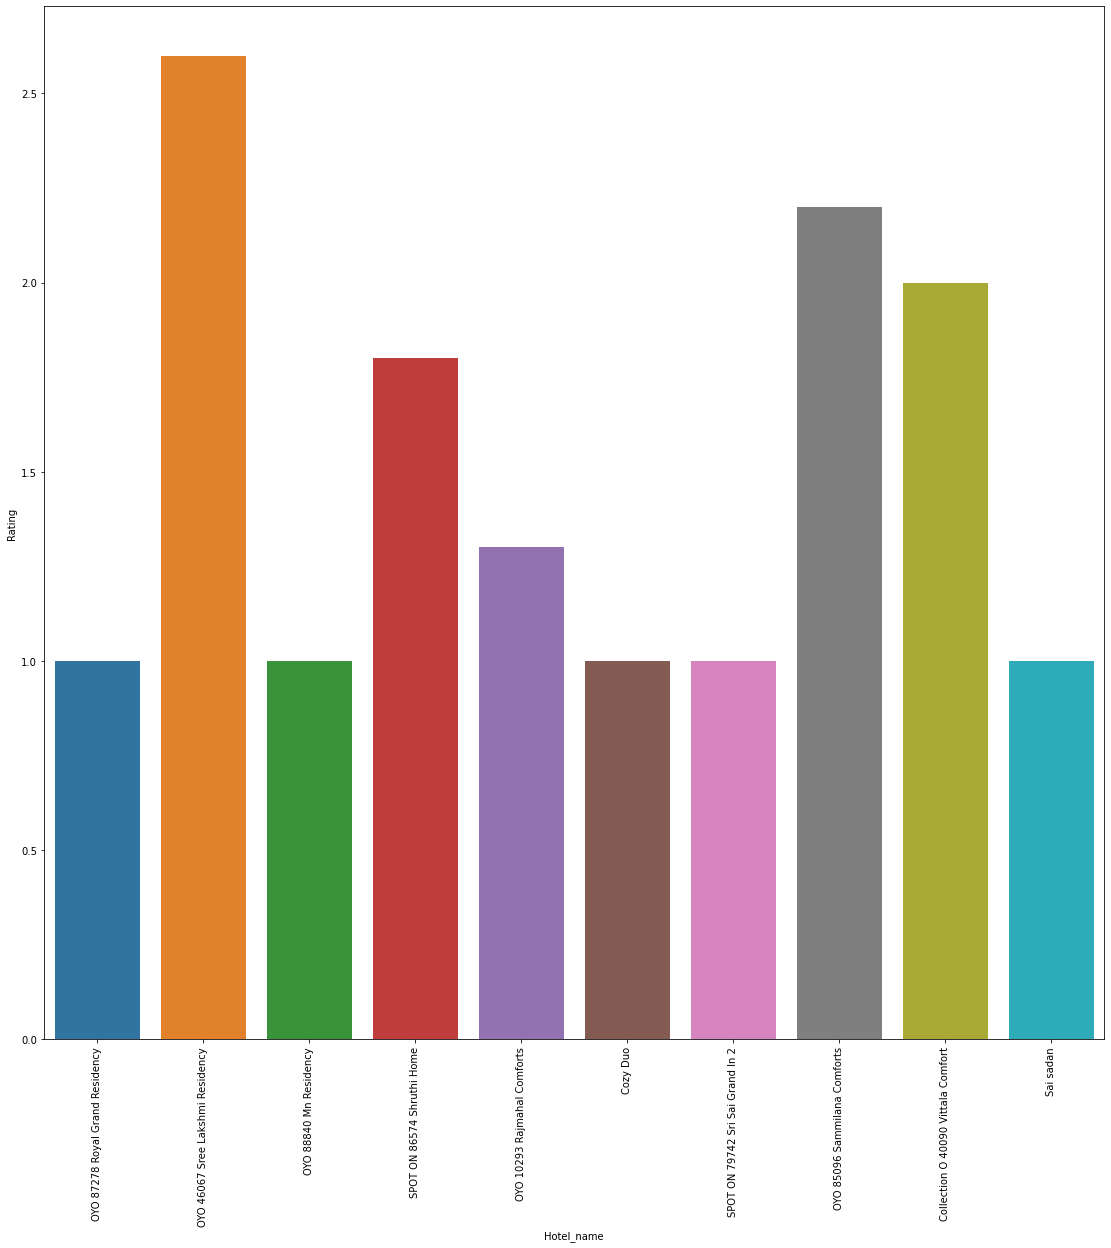

In [65]:
plt.figure(figsize=(19,19))
sns.barplot(low_rating,Hotel_df['Rating'])
plt.xticks(rotation=90)

# Hotel's with Low rating's that is between 1.0 to 3.0

In [66]:
Below_average_rating= Hotel_df[(Hotel_df['Rating']>3.0) & (Hotel_df['Rating']<4.0)]['Hotel_name']

In [67]:
Average_rating= Hotel_df[(Hotel_df['Rating']>4.0) & (Hotel_df['Rating']<5.0)]['Hotel_name']

In [68]:
Pleasant_rating= Hotel_df[(Hotel_df['Rating']>5.0) & (Hotel_df['Rating']<6.0)]['Hotel_name']

In [69]:
Good_rating= Hotel_df[(Hotel_df['Rating']>6.0) & (Hotel_df['Rating']<6.8)]['Hotel_name']

In [70]:
Very_Good_rating=Hotel_df[(Hotel_df['Rating']>6.8) & (Hotel_df['Rating']<7.5)]['Hotel_name']

In [71]:
Superb_rating=Hotel_df[(Hotel_df['Rating']>7.5) & (Hotel_df['Rating']<8.1)]['Hotel_name']

In [72]:
fabulous_rating=Hotel_df[(Hotel_df['Rating']>8.1) & (Hotel_df['Rating']<8.8)]['Hotel_name']

In [73]:
Marvellous_rating=Hotel_df[(Hotel_df['Rating']>8.8) & (Hotel_df['Rating']<9.9)]['Hotel_name']

In [74]:
Exceptional_Rating= Hotel_df[Hotel_df['Rating']>9.9]['Hotel_name']

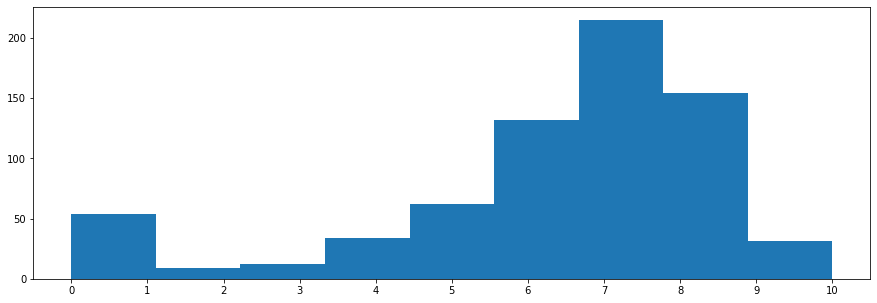

In [75]:
plt.figure(figsize=(15,5))
plt.hist(Hotel_df['Rating'], bins=9)
plt.xticks(np.arange(0,11,1))
plt.show()

#Ditribution of Ratings

<Figure size 720x360 with 0 Axes>

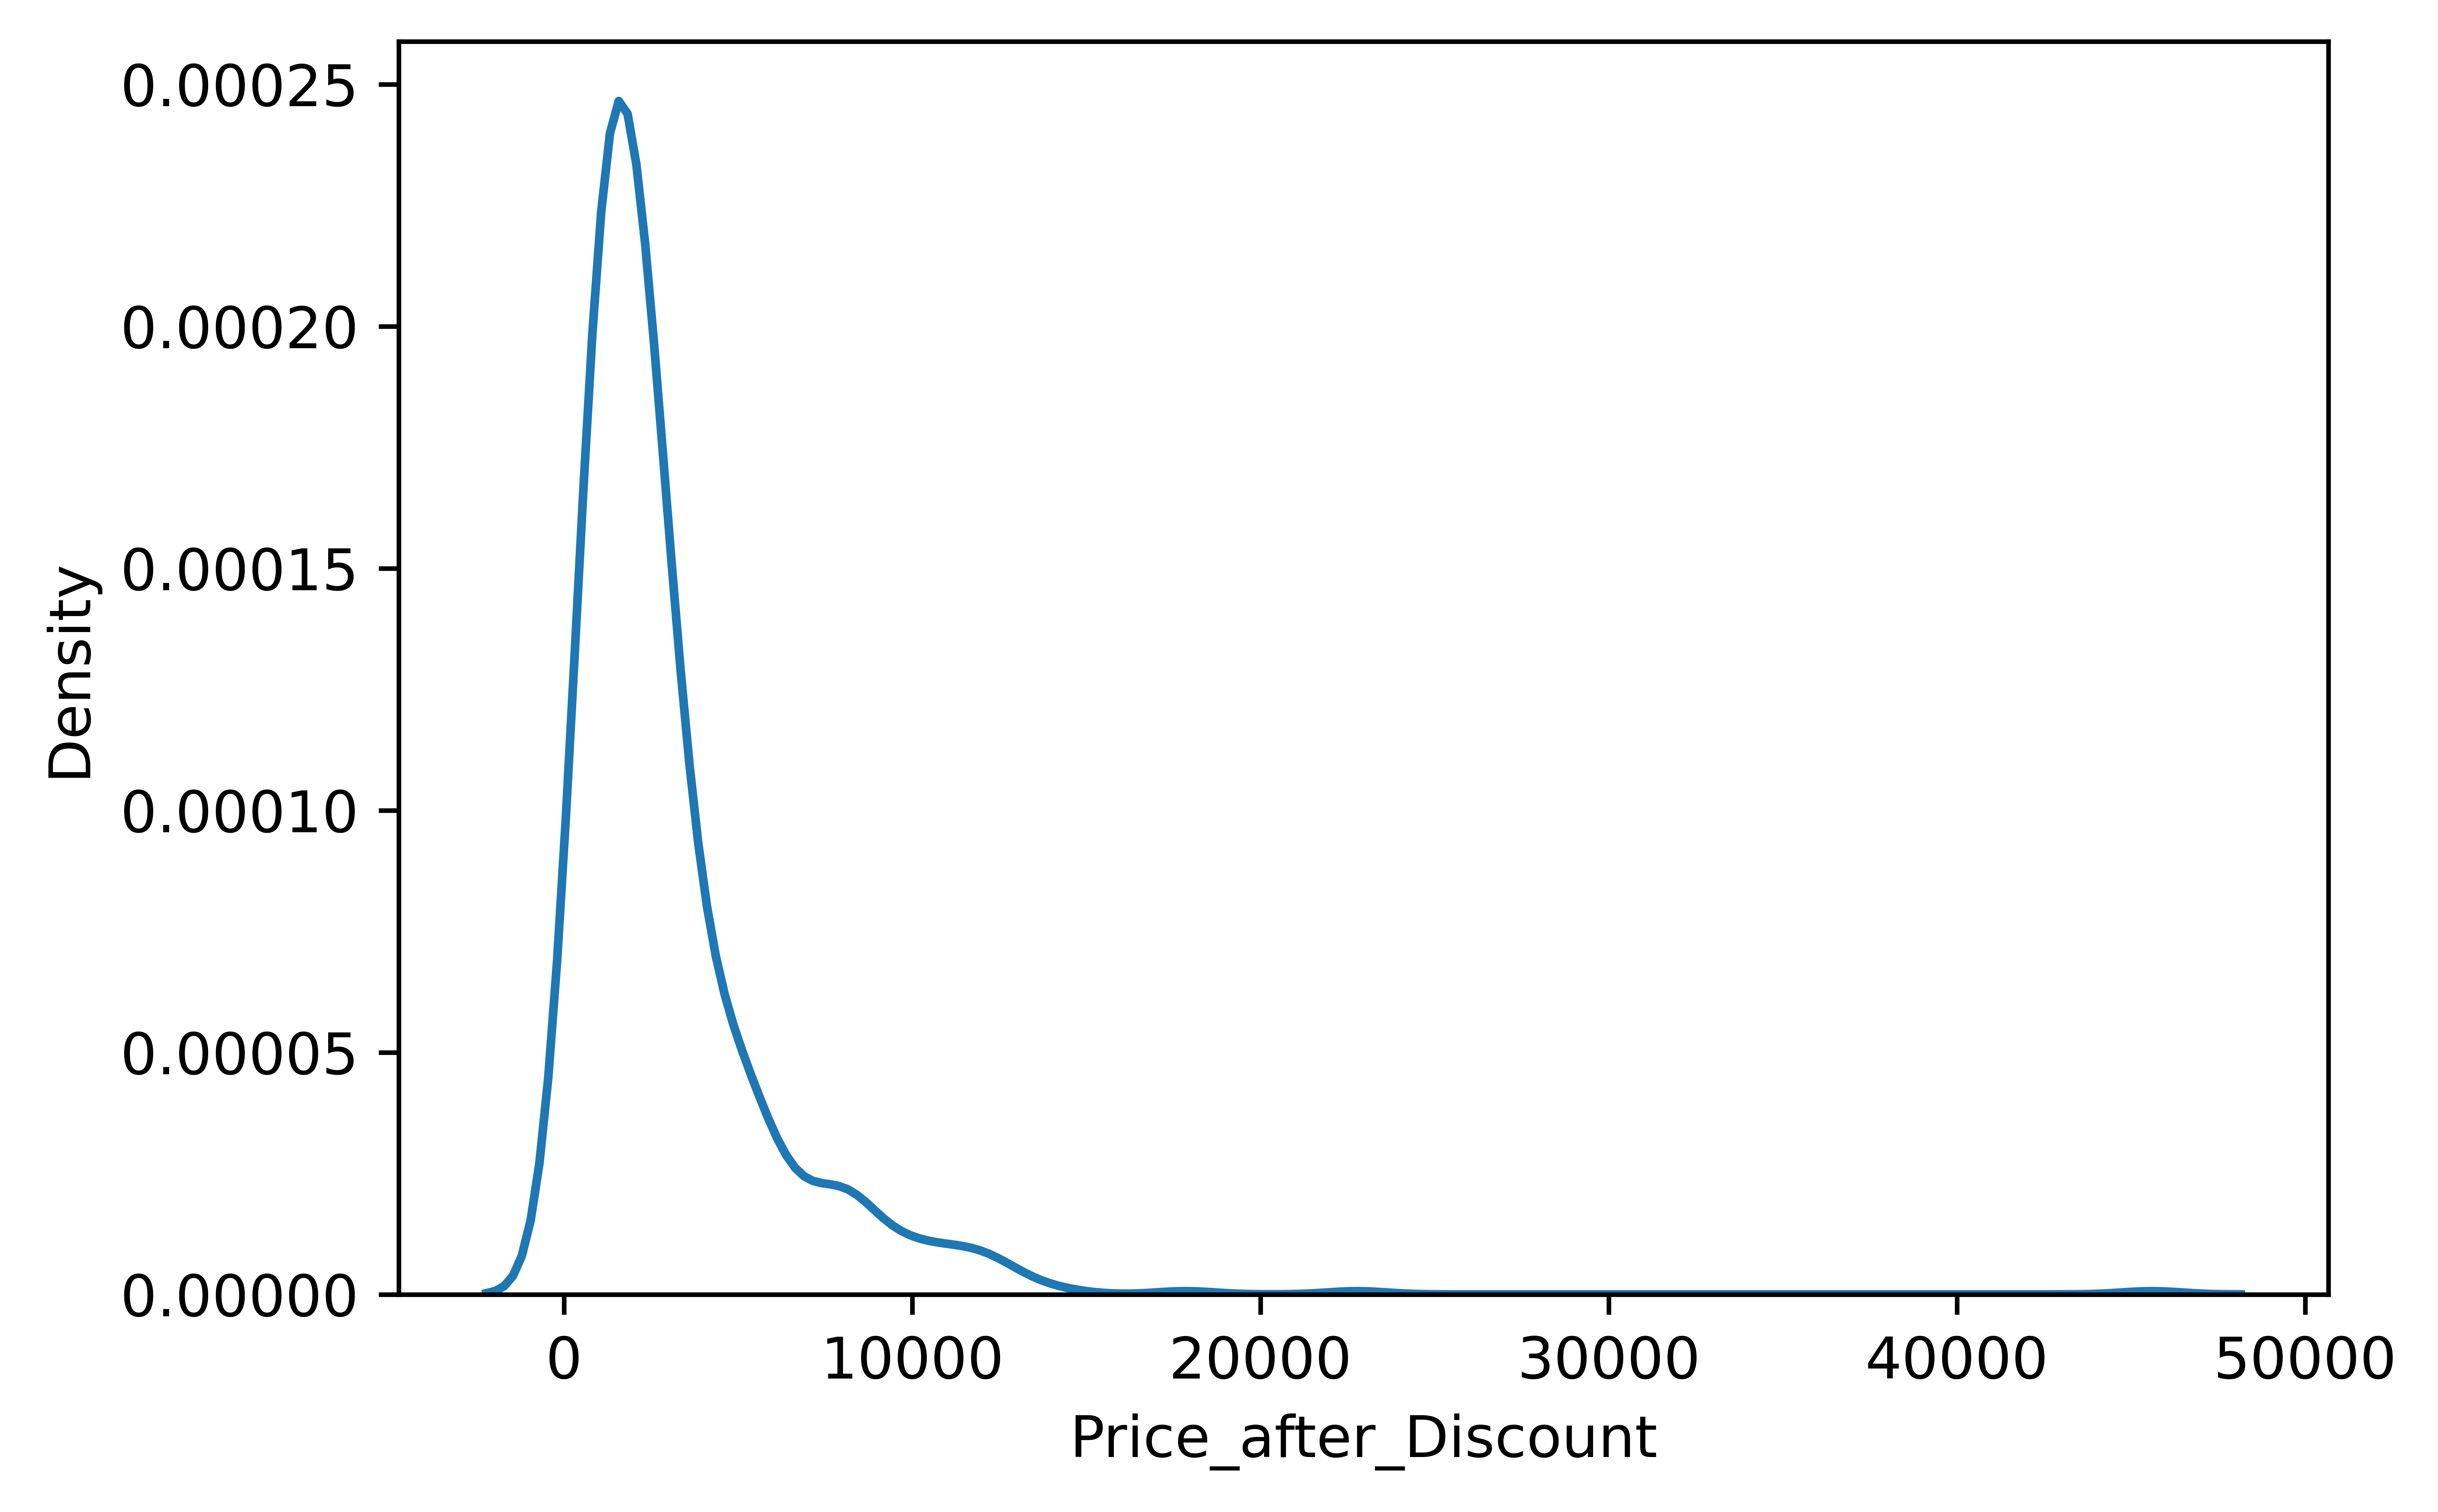

In [76]:
plt.figure(figsize=(10,5))
plt.figure(dpi=1200)
sns.kdeplot(Hotel_df['Price_after_Discount']);

<Figure size 7200x4800 with 0 Axes>

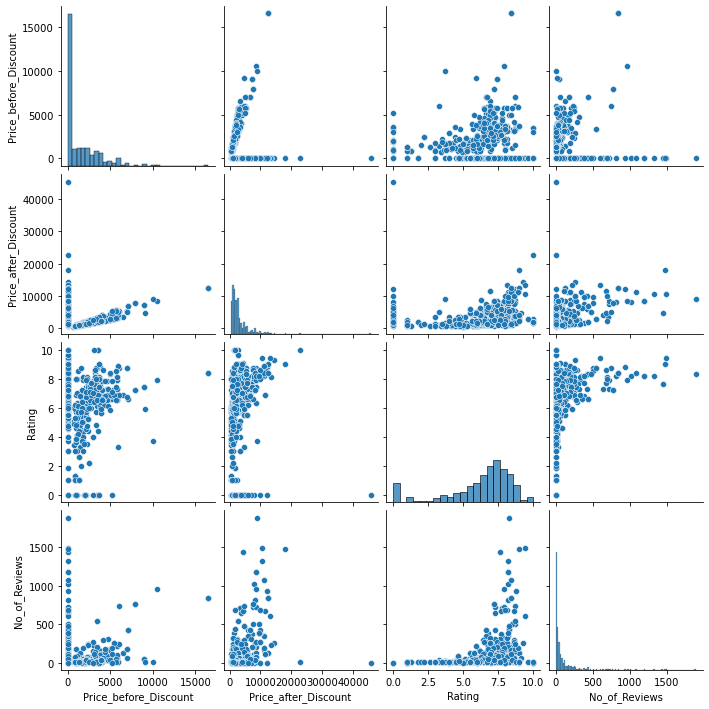

In [77]:
plt.figure(dpi = 1200)
sns.pairplot(Hotel_df)

In [31]:
Hotel_df.corr()

,Price_before_Discount,Price_after_Discount,Rating,No_of_Reviews
Price_before_Discount,1.000000,0.137977,0.081361,0.096045
Price_after_Discount,0.137977,1.000000,0.180668,0.472848
Rating,0.081361,0.180668,1.000000,0.311583
No_of_Reviews,0.096045,0.472848,0.311583,1.000000


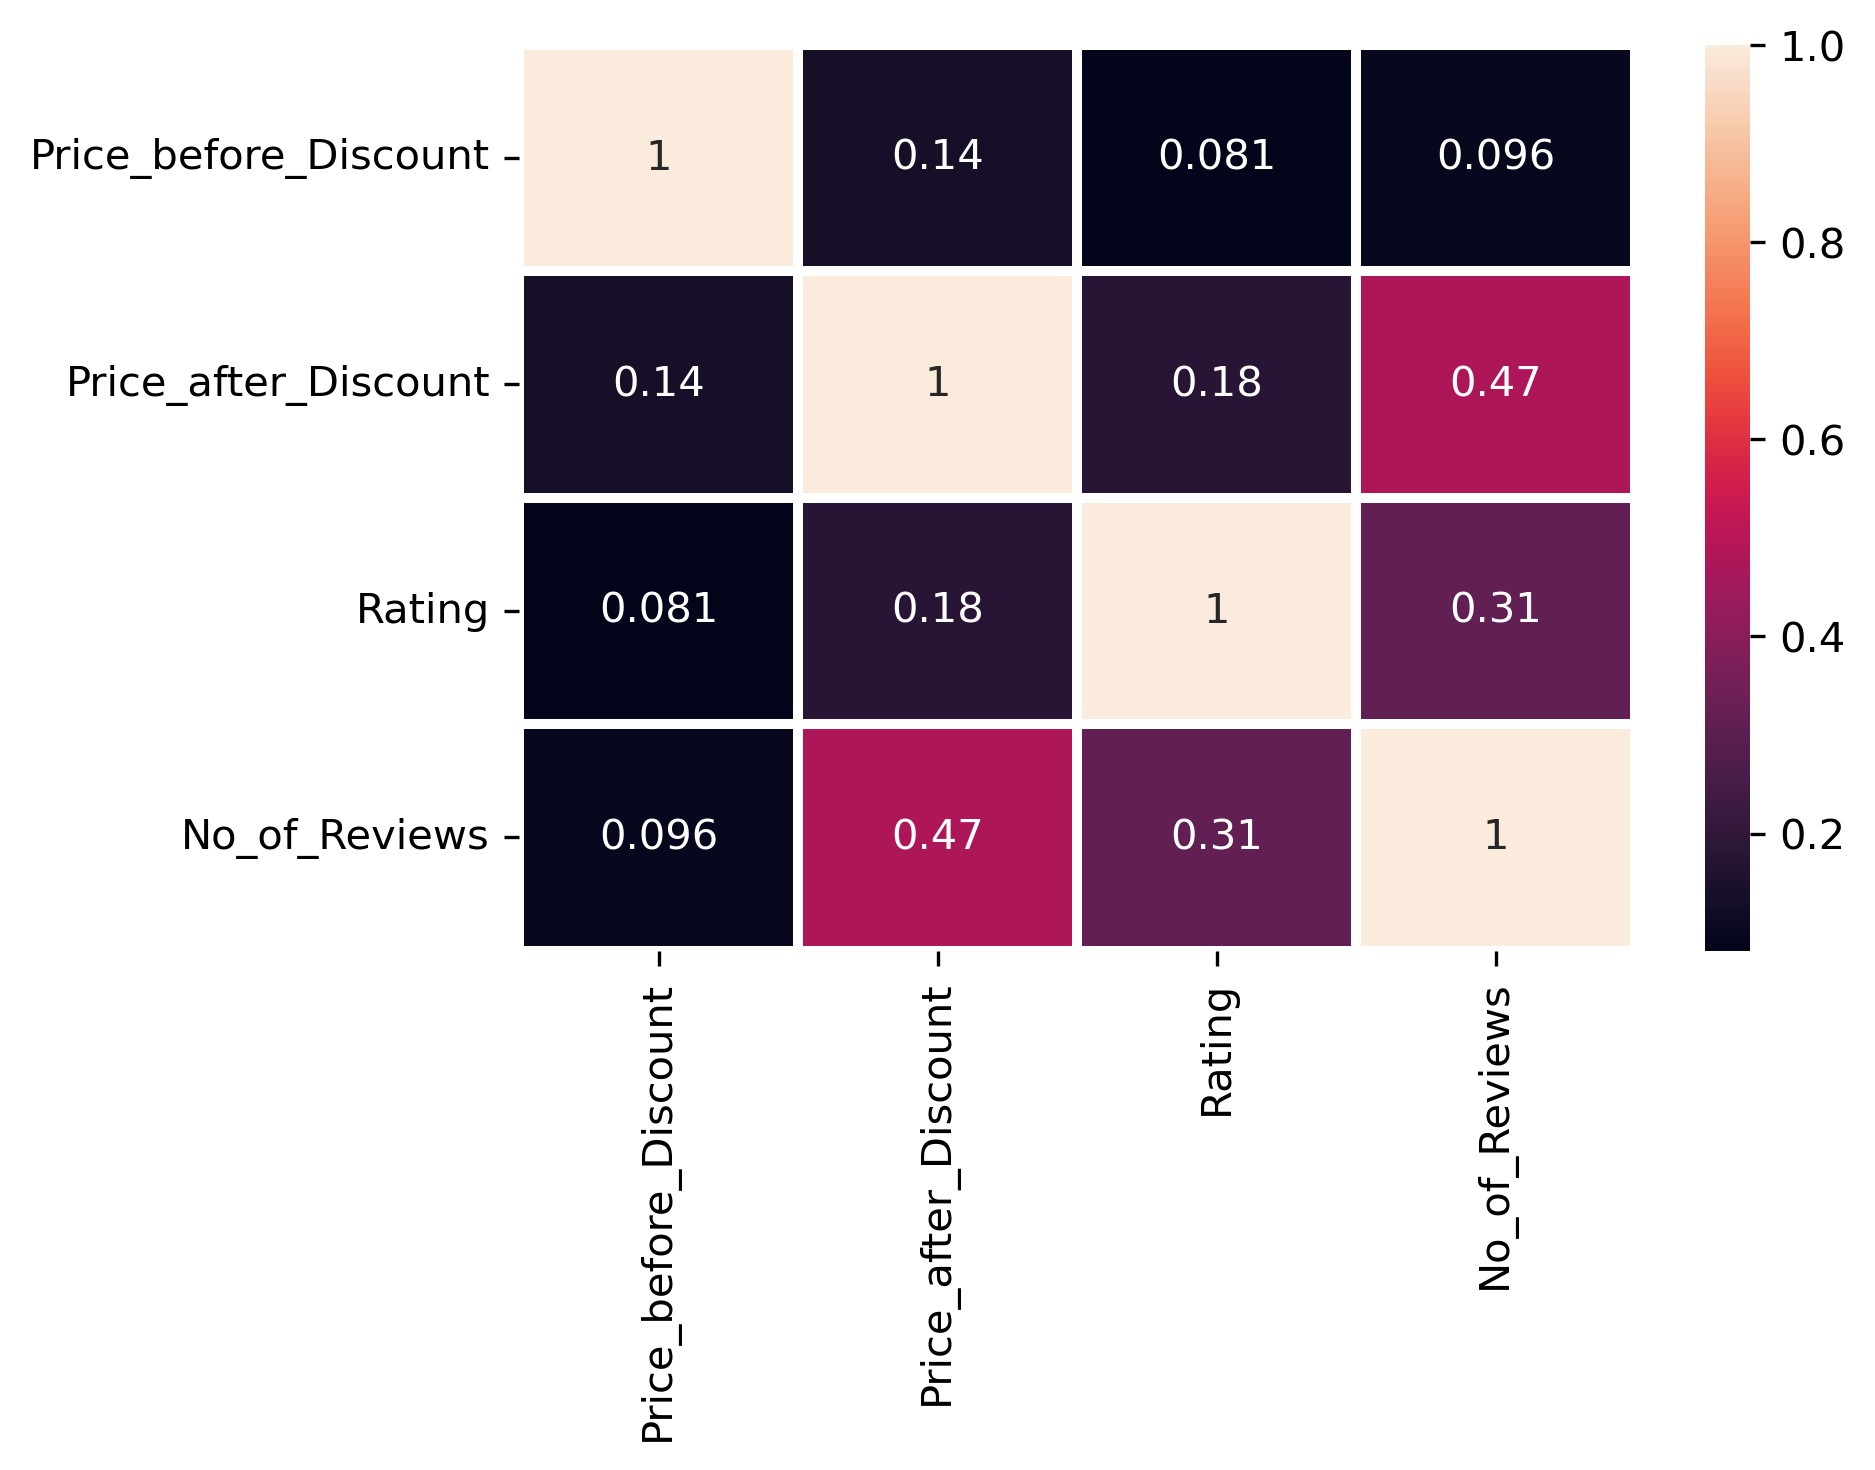

In [29]:
plt.figure(dpi = 300)
sns.heatmap(Hotel_df.corr(),linecolor='white',linewidths=2,annot=True);

### To show all the numeric data

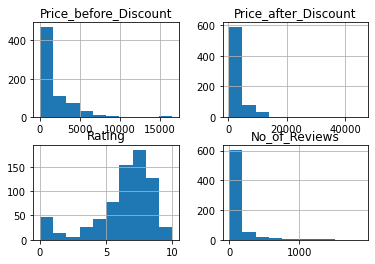

In [78]:
Hotel_df.hist()
plt.show()

<AxesSubplot:xlabel='Review', ylabel='count'>

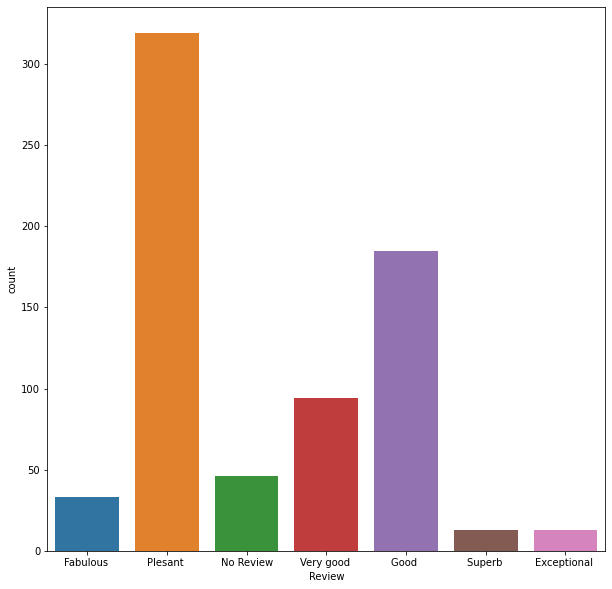

In [79]:
plt.figure(figsize=(10,10))

sns.countplot(x='Review',data=Hotel_df)

# Reviews for No of Hotels

In [80]:
# Here we can see that the very few Hotel's have exceptional reviews while the Hotel's with Pleasant review's are very High

<AxesSubplot:xlabel='count', ylabel='Rating'>

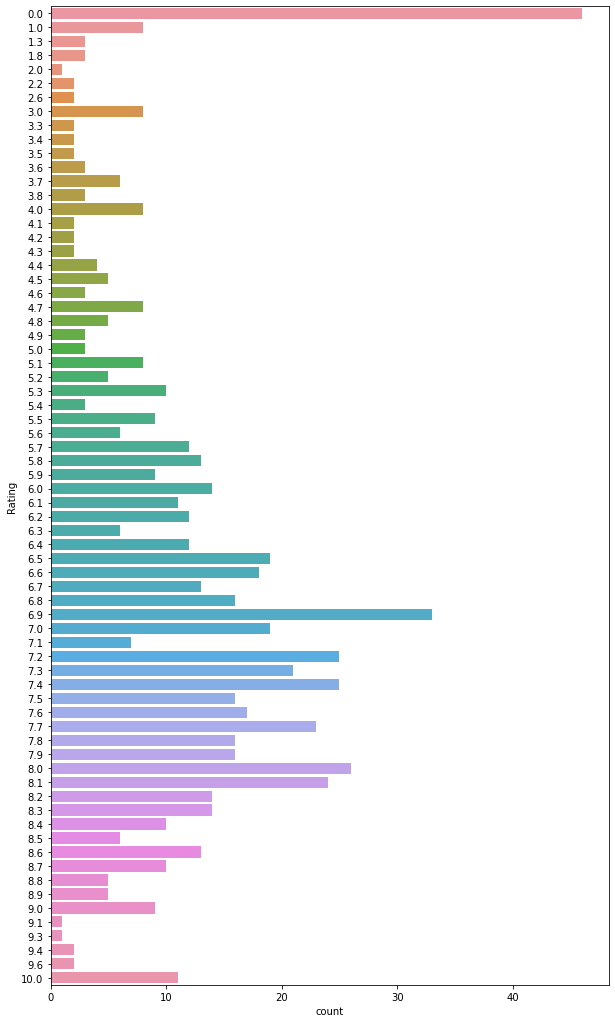

In [81]:
plt.figure(figsize=(10,18))

sns.countplot(y='Rating',data=Hotel_df)

# Hotel's with No of ratings

In [82]:
# Here we can see that many hotel's doesn't have ratings while  most of hotel's lie in betwwen 6.0 to 8.0

In [83]:
Hotel_df['Type_of_Room'].value_counts()

Standard Double Room                                                                 98
Deluxe Double Room                                                                   77
Classic Triple Room                                                                  70
Deluxe Room                                                                          48
Standard Double or Twin Room                                                         21
                                                                                     ..
Day Use Room  (Check in at 12 PM and Check out at 5 PM on the SAME Day)               1
Executive Club Room                                                                   1
Fairfield Premier Room, Guest Room, with Double Bed & Flexible check-in/check-out     1
King Hilton Guestroom with Sofa cum Bed, Bathtub, 15% disc on F&B andSpa              1
Deluxe Single Room with Balcony                                                       1
Name: Type_of_Room, Length: 136,

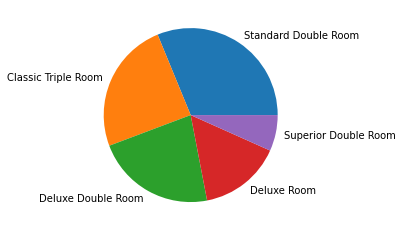

In [3]:
# types of rooms available

values = [98, 77, 70, 48, 21]

labels = ['Standard Double Room','Classic Triple Room','Deluxe Double Room','Deluxe Room ','Superior Double Room ']
plt.pie(values,labels= labels)
plt.show();

In [85]:
# Major rooms available in most of the Hotel's while there other type of rooms these are mostly avaible in majority of Hotels 

<AxesSubplot:xlabel='Price_after_Discount', ylabel='Rating'>

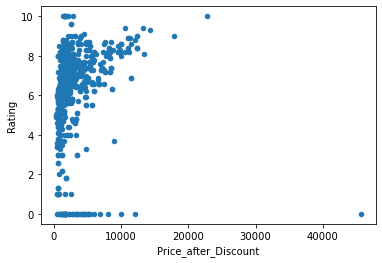

In [86]:
 Hotel_df.plot(x="Price_after_Discount", y="Rating", kind="scatter")
#Prices and Ratings

In [87]:
# Problem Statement : If customer asks for a Hotel room with a price between 4000 to 6000

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 [Text(0, 0, 'ibis Bengaluru Hosur Road - An Accor Brand'),
  Text(1, 0, 'ibis Bengaluru City Centre - An Accor Brand'),
  Text(2, 0, 'The Chancery Hotel'),
  Text(3, 0, 'The Elanza Hotel, Bangalore'),
  Text(4, 0, 'Fairfield by Marriott Bengaluru Rajajinagar'),
  Text(5, 0, 'Holiday Inn Express & Suites Bengaluru Old Madras Road, an IHG Hotel'),
  Text(6, 0, 'Aloft Bengaluru Whitefield'),
  Text(7, 0, 'Ginger Bangalore- Whitefield'),
  Text(8, 0, 'Hotel Ballal Residency'),
  Text(9, 0, 'Vividus'),
  Text(10, 0, 'Fortune Park JP Celestial - Member ITC Hotel Group, Bengaluru'),
  Text(11, 0, 'Iris Hotel & Spa'),
  Text(12, 0, 'Adarsh Hamilton'),
  Text(13, 0, 'Hotel Empire International Kormangala'),
  Text(14, 0, 'Tulip Inn Koramangala'),
  Text(15, 0, 'SREE PARIJATHA

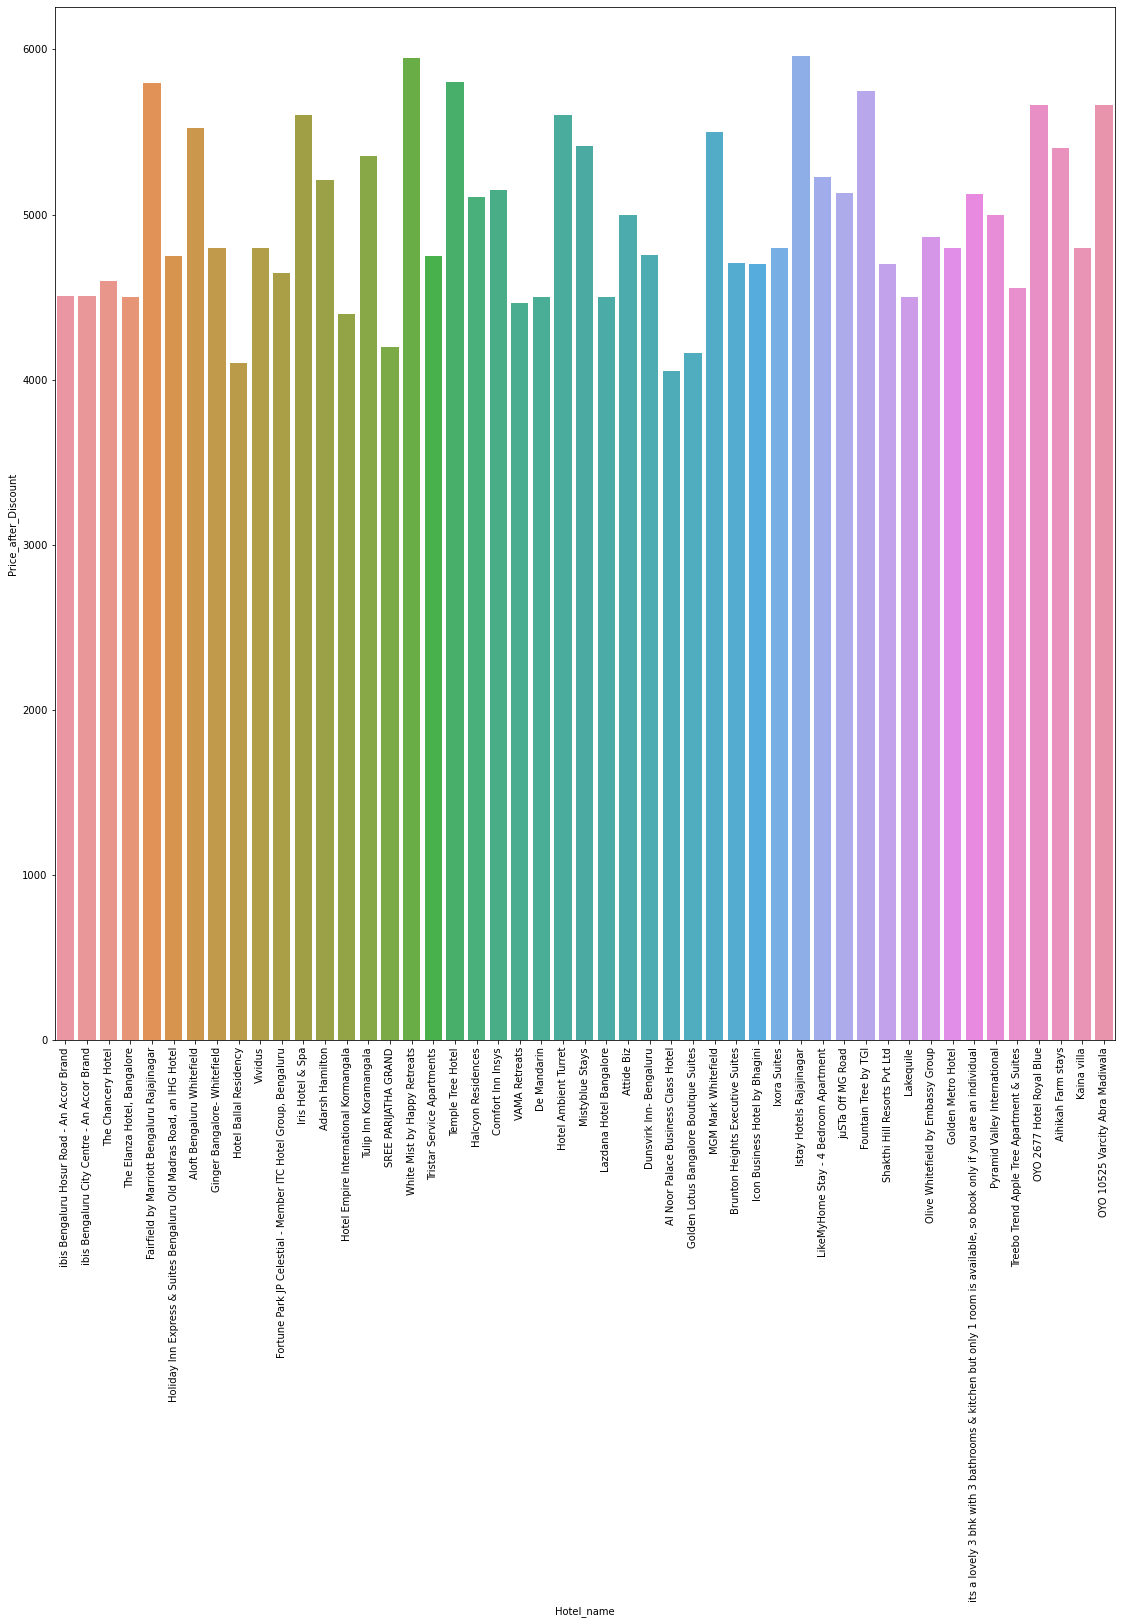

In [88]:
plt.figure(figsize=(19,19))
sns.barplot(Thoda_Expensive,Hotel_df['Price_after_Discount'])
plt.xticks(rotation=90)

In [89]:
# Problem Statement2 : If customer asks for a Hotel's with a rating of 10

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Hotel Panchvati Comforts'),
  Text(1, 0, 'La Sara Gateway'),
  Text(2, 0, 'RVR Abode'),
  Text(3, 0, 'Octave Vels Grand Hotel'),
  Text(4, 0, 'Treebo Trend JJ Residency'),
  Text(5, 0, 'Surya Nilaya'),
  Text(6, 0, 'StayVista at Ananta')])

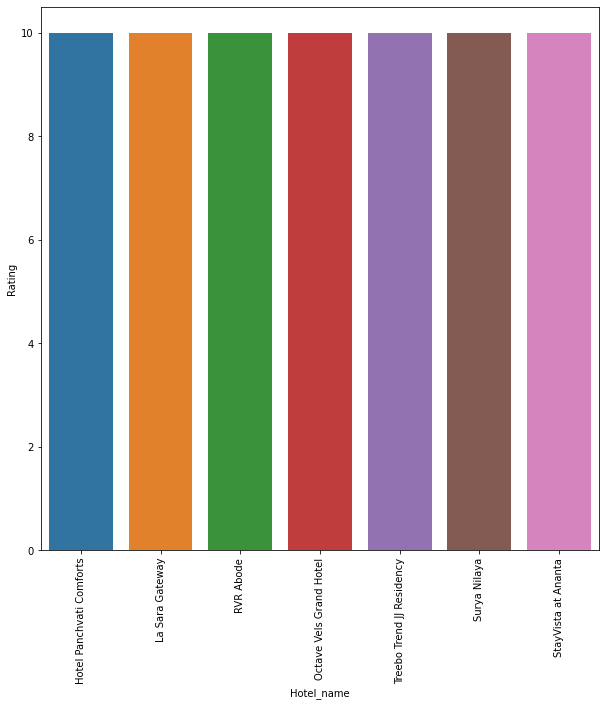

In [90]:
plt.figure(figsize=(10,10))
sns.barplot(Exceptional_Rating,Hotel_df['Rating'])
plt.xticks(rotation=90)

In [32]:
# Scenario if someone asks for a room with 1500 with deluxe souble room with plesant rating and a doublr bed

In [30]:
price3_df= Hotel_df.loc[(Hotel_df['Price_after_Discount']==1500)]

In [ ]:
price3.df

In [77]:
rslt_df=price3_df.loc[(price3_df['Type_of_Beds']=='1 large double bed')]

In [78]:
rslt_df

,Hotel_name,Price_before_Discount,Price_after_Discount,Tax_and_Charges,Type_of_Room,Type_of_Beds,Rating,Review,No_of_Reviews,Rooms_left,Cancellation
233,Octave Himalaya Monarch,0,1500,180,Deluxe Double Room,1 large double bed,6.8,Plesant,26,No Rooms left,FREE cancellation • No prepayment needed
